In [3]:
import requests
import os
import json
from twitter_api_keys import bearer_token
from pdb import set_trace
import pandas as pd
import ast
import yaml
import matplotlib.pyplot as plt
import csv
import numpy as np
import math
from scipy import stats
from collections import Counter

# sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
def create_twitter_url_mentions(mention):
    max_results = 100
    mrf = "max_results={}".format(max_results)
    q = "query=" + mention
    url = "https://api.twitter.com/2/tweets/search/recent?{}&{}%20lang%3Aen".format(
        mrf, q)
    url2 = "https://api.twitter.com/2/users/{}/mentions"
    return url


def twitter_auth_and_connect(bearer_token, url):
    query_params = {
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    response = requests.request("GET", url, headers=headers, params=query_params)
    return response.json()

# twitter_auth_and_connect(bearer_token,"https://api.twitter.com/2/tweets/search/recent?max_results=100&query=Walmart")

In [182]:
def get_companies():
    small = []
    big = []
    companies = pd.read_excel('entities.xlsx', sheet_name = [0])[0]

    for i in range(0, companies.shape[0]):
            if (i <= 99) & (companies['handle'][i] != 'na') & (str(companies['handle'][i]) !=  "nan"): #20 
                big.append(companies['handle'][i])
                print(companies['handle'][i])
            if (i >= 899) & (companies['handle'][i] != 'na') & (str(companies['handle'][i]) !=  "nan"): #979
                small.append(companies['handle'][i])
    print(big)
    print(len(big))
    print(small)
    print(len(small))
    return big, small

all_tweets_json_list = []

def get_tweets(entities, entity_name):
    query_params = {
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    print('getting tweets: ', entity_name)

    tweets = []
    for entity in entities:
        if entity != entity:
            continue
        
        res_json = []
        
        while len(res_json) == 0:
            url = create_twitter_url_mentions("@"+entity)
            print(url)
            res_json = twitter_auth_and_connect(bearer_token, url)
            
        print(res_json)
        all_tweets_json_list.append(res_json)
        
        if 'data' in res_json:
            for t in res_json['data']:
                print(t)
                text = t['text']
                ps = analyzer.polarity_scores(text) #sentiment
#                 doc = nlp(text) #is it english? 
                try:
                    tweet_dict = {'entity': entity, 'text':text, 'sentiment':ps['compound']}
                        
                    tweets.append(tweet_dict)
                except:
                    set_trace()
    return tweets

In [183]:
big, small = get_companies()
big

Walmart
Amazon
exxonmobil
Apple
CVSHealth
BHHSRealEstate
UnitedHealthGrp
McKesson
ATT
Healthcare_ABC
Alphabetinc
Ford
Cigna
Costco
Chevron
cardinalhealth
jpmorgan
GM
Walgreens
Verizon
Microsoft
MarathonPetroCo
kroger
FannieMae
BankofAmerica
HomeDepot
Phillips66Co
comcast
anthemgame
WellsFargo
Citi
ValeroEnergy
generalelectric
DellTech
JNJGlobalHealth
StateFarm
Target
IBM
RaytheonTech
Boeing
FreddieMac
Centene
UPS
Lowes
intel
Facebook
FedEx
MetLife
DisneyStudios
ProcterGamble
PepsiCo
Humana
Prudential
ADMupdates
Albertsons
Sysco
LockheedMartin
HP
EnergyTransfer
GoldmanSachs
MorganStanley
CaterpillarInc
Cisco
pfizer
HCAhealthcare
AIGinsurance
AmericanExpress
Delta
Merck
AmericanAir
GetSpectrum
Allstate
NewYorkLife
OnYourSide
BestBuySupport
united
LibertyMutual
DowNewsroom
TysonFoods
tjmaxx
TIAA
Oracle
generaldynamics
JohnDeere
Nike
progressive
Publix
CocaCola
massmutual
Tech_Data
world_fuel
Honeywell International
conocophillips
USAA
Exelon
northropgrumman
CapitalOne
PlainsMidstream
AbbV

['Walmart',
 'Amazon',
 'exxonmobil',
 'Apple',
 'CVSHealth',
 'BHHSRealEstate',
 'UnitedHealthGrp',
 'McKesson',
 'ATT',
 'Healthcare_ABC',
 'Alphabetinc',
 'Ford',
 'Cigna',
 'Costco',
 'Chevron',
 'cardinalhealth',
 'jpmorgan',
 'GM',
 'Walgreens',
 'Verizon',
 'Microsoft',
 'MarathonPetroCo',
 'kroger',
 'FannieMae',
 'BankofAmerica',
 'HomeDepot',
 'Phillips66Co',
 'comcast',
 'anthemgame',
 'WellsFargo',
 'Citi',
 'ValeroEnergy',
 'generalelectric',
 'DellTech',
 'JNJGlobalHealth',
 'StateFarm',
 'Target',
 'IBM',
 'RaytheonTech',
 'Boeing',
 'FreddieMac',
 'Centene',
 'UPS',
 'Lowes',
 'intel',
 'Facebook',
 'FedEx',
 'MetLife',
 'DisneyStudios',
 'ProcterGamble',
 'PepsiCo',
 'Humana',
 'Prudential',
 'ADMupdates',
 'Albertsons',
 'Sysco',
 'LockheedMartin',
 'HP',
 'EnergyTransfer',
 'GoldmanSachs',
 'MorganStanley',
 'CaterpillarInc',
 'Cisco',
 'pfizer',
 'HCAhealthcare',
 'AIGinsurance',
 'AmericanExpress',
 'Delta',
 'Merck',
 'AmericanAir',
 'GetSpectrum',
 'Allstate',
 '

In [108]:
def get_descriptives(tweets, entity_name):
    print('getting descriptives: ', entity_name)

    df = pd.DataFrame(tweets)
    counts = df.groupby('entity').count().reset_index()
    means = df.groupby('entity').mean().reset_index()
    means['count'] = counts['sentiment']
    mean = np.mean(means['sentiment'][means['count'] >= 10])
    sem = stats.sem(means['sentiment'][means['count'] >= 10])

    print('mean: ', mean)
    print('sem: ', sem)
    print('# entries: ', str(len(means['sentiment'])))

    return mean, sem, means[means['count']>=10]

def plot(entity_names, means, sems):
    print('plotting...')
    plt.bar(entity_names, means,yerr=sems)
    plt.xlabel("Entity", fontsize=20)
    plt.ylabel("Tweet Sentiment", fontsize=20)
    plt.savefig('new_plot.png')


In [76]:
xl = pd.ExcelFile('entities.xlsx')
entities = xl.sheet_names
num_entities = len(entities)

In [128]:
# initialie dictionaries
dd = {}; tweets = {}; means = {}; sems = {}; statis = {}

In [137]:
pd.read_excel('entities.xlsx', sheet_name = [2])[2]

twitter_music_rank  overall_twitter_rank              name  \
0                    1                     1     Justin Bieber   
1                    2                     2         Lady Gaga   
2                    3                     3        Katy Perry   
3                    4                     5           Rihanna   
4                    5                     6      Taylor Swift   
..                 ...                   ...               ...   
95                  96                   264  Miranda Cosgrove   
96                  97                   267  Enrique Iglesias   
97                  98                   271             Ciara   
98                  99                   274        Siwon Choi   
99                 100                   279             Ke$ha   

     original_handle           handle      country  followers  
0      @justinbieber     justinbieber       Canada   37617919  
1          @ladygaga         ladygaga          USA   36218810  
2         @katyperry        katyperry          USA   35048911  
3           @rihanna          rihanna          USA   29217969  
4     @taylorswift13    taylorswift13          USA   26317147  
..               ...              ...          ...        ...  
95  @MirandaCosgrove  MirandaCosgrove          USA    3447970  
96       @enrique305       enrique305        Spain    3421631  
97            @ciara            ciara          USA    3391816  
98         @siwon407         siwon407  South Korea    3377469  
99        @keshasuxx        keshasuxx          USA    3328797  

[100 rows x 7 columns]

In [171]:
# initialie dictionaries
# dd = {}; tweets = {}; means = {}; sems = {}; statis = {}
all_tweets_json_list = []

i = 12
company_names = []


dd[i] = pd.read_excel('entities.xlsx', sheet_name = [i])[i]
company_names = []
for a,b in enumerate(list(dd[i]['handle'])):
    if str(b)!= "na" and str(b)!="nan": 
        company_names.append(b)
    else:
        pass
tweets[i] = get_tweets(company_names, entities[i])
means[i], sems[i], statis[i] = get_descriptives(tweets[i], entities[i])

with pd.ExcelWriter('{}_fixed_code_tweet_sentiment.xlsx'.format(entities[i])) as writer:
    tweets_df = pd.DataFrame.from_dict(tweets[i])
    tweets_df.to_excel(writer, sheet_name=entities[i])
    
pd.DataFrame(all_tweets_json_list).to_csv("raw_tweets/all_{}_tweets.csv".format(entities[i]))

getting tweets:  Performing Arts
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@kencen%20lang%3Aen
{'data': [{'text': 'Have you purchased your tickets for Hamilton Musical at the @kencen yet? Don’t throw away your shot! https://t.co/gsQBUupFVq Check out the @GMA Concert Series on 8/5! 👇🏾 https://t.co/1JqEupeP4L', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T18:16:21.000Z', 'author_id': '1432159474643521539', 'id': '1546559033489883137', 'source': 'Twitter for iPhone', 'lang': 'en', 'referenced_tweets': [{'type': 'quoted', 'id': '1545062260707655681'}], 'reply_settings': 'everyone', 'conversation_id': '1546559033489883137'}, {'text': "RT @Kamilahf: Grateful for the chance to come together again w/ \n@bamuthi and @paolaprestini for S2 of @kencen's Active Hope Podcast!\n\n🎙 ht…", 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07

{'data': [{'referenced_tweets': [{'type': 'retweeted', 'id': '1546525462733770753'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1546565470031167495', 'id': '1546565470031167495', 'source': 'Twitter for iPhone', 'text': 'RT @clintramos: This is what community looks like. Yesterday @LincolnCenter threw a wedding for 500 couples whose weddings were cancelled o…', 'created_at': '2022-07-11T18:41:56.000Z', 'author_id': '274123901'}, {'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1546564734316679171', 'id': '1546564734316679171', 'source': 'Sprout Social', 'text': 'Putting on the @FestivalofNY was no simple task. Learn about the work being done to bring the #FestivalOfNY to life in this talk with @shantourage, Chief Artistic Officer of @LincolnCenter, and the @nypl.\n\n

{'data': [{'created_at': '2022-07-11T18:29:12.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546561248124215296'}], 'id': '1546562265582747648', 'author_id': '1469500033', 'lang': 'en', 'conversation_id': '1546562265582747648', 'source': 'Twitter for iPhone', 'text': 'RT @Attache4Culture: Here are this week\'s BEST BETS: West Side Story @HollywoodBowl w/ @LAPhil &amp; @GustavoDudamel; @ITWBroadway; "American P…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-11T18:27:56.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546558544119353344'}], 'id': '1546561946111156229', 'author_id': '22227650', 'lang': 'en', 'conversation_id': '1546561946111156229', 'source': 'Twitter Web App', 'text': 'RT @lauritzen_brian: The @LAPhil gave its first perf at the @HollywoodBowl 💯 years ago today. "Father of the Bowl," Alfred Hertz, conducted…', 'reply_settings': 'everyone', 'public_

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@NationalTheatre%20lang%3Aen
{'data': [{'author_id': '856811670328553472', 'created_at': '2022-07-11T17:55:31.000Z', 'text': "RT @NationalTheatre: 'There are five ways for the world to end. Spoiler alert.' \n\nMosquitoes with Olivia Colman, Olivia Williams and Joseph…", 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 15, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1546460121076736001'}], 'lang': 'en', 'conversation_id': '1546553790668611588', 'reply_settings': 'everyone', 'id': '1546553790668611588'}, {'author_id': '1239420981917122560', 'created_at': '2022-07-11T17:52:09.000Z', 'text': 'at my happy place ✨💙 @NationalTheatre https://t.co/3vJVEci9dV', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'lang': 'en', 'conversation_id': '1

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@BostonSymphony%20lang%3Aen
{'data': [{'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546546044019802112'}], 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'created_at': '2022-07-11T18:38:43.000Z', 'author_id': '1310870787927220224', 'text': 'RT @andris_nelsons: What a special weekend full of amazing concerts! It is such a pleasure to be back at @TanglewoodMA and I am so grateful…', 'id': '1546564661549858816', 'conversation_id': '1546564661549858816'}, {'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546546044019802112'}], 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'created_at': '2022-07-11T17:35:39.000Z', 'author_id': '102632710', 'text': '

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@TheRSC%20lang%3Aen
{'data': [{'created_at': '2022-07-11T18:44:27.000Z', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546479596262100992'}], 'id': '1546566103949889536', 'author_id': '175479912', 'lang': 'en', 'conversation_id': '1546431108082028546', 'in_reply_to_user_id': '289982822', 'source': 'Twitter Web App', 'text': '@itshattieseason @JSTheatre @LiveTheatre @TheRSC @painesplough @northernstage @rxtheatre @e_bmgb @powelljones_s @DavidMJTDoyle Thanks lovely!', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-11T18:14:16.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546441762473910272'}], 'id': '1546558509529141252', 'author_id': '1401996965240508421', 'lang': 'en', 'conversation_id': '1546558509529141252', 'source': 'Twitter for Android', 'text': 'RT @TheRSC: The de

{'data': [{'author_id': '756520269603282945', 'created_at': '2022-07-11T15:49:48.000Z', 'text': "RT @TheCultureLP: Check out The Culture LP's special picks for some dope shows at @JoesPub for the upcoming month. Peep the link and let us…", 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 7, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545451709232689152'}], 'lang': 'en', 'conversation_id': '1546522152450629632', 'reply_settings': 'everyone', 'id': '1546522152450629632'}, {'author_id': '18070785', 'created_at': '2022-07-11T15:04:36.000Z', 'text': 'RT @BunnyBuxom: Saturday @JoesPub will be filled with the strange, the funny, and the sexy, but I’ll be bringing the GLAMOUR to @PinkRoomBu…', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1546510589576593409'}], 'lang': 'en', 'conversat

{'data': [{'id': '1546557564493541376', 'created_at': '2022-07-11T18:10:31.000Z', 'text': 'RT @jilltalbot: Yesterday I had the honor to Zoom into a class at @92ndStreetY for a Q&amp;A about my essays and a man asked if ghosts whisper…', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '897276725607804928', 'lang': 'en', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546492914968285184'}], 'conversation_id': '1546557564493541376'}, {'id': '1546537821703389185', 'created_at': '2022-07-11T16:52:04.000Z', 'text': 'RT @92ndStreetY: Just booked! @SofiaCarson will be here to discuss Purple Hearts, her new @NetflixFilm romance #PurpleHeartsNetflix! Check…', 'public_metrics': {'retweet_count': 75, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '885202494103711746', 'lang': 'en', 'source': 'Twitter for Android', 'reply_settings': 'everyone', 'referenced_

{'data': [{'lang': 'en', 'conversation_id': '1546552421635293186', 'text': 'The US Opera Companies Daily is out! https://t.co/pfSr7dlGUR Stories via @TheDallasOpera @SFOpera', 'source': 'Paper.li', 'reply_settings': 'everyone', 'author_id': '112766105', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'id': '1546552421635293186', 'created_at': '2022-07-11T17:50:05.000Z'}, {'lang': 'en', 'conversation_id': '1546545803052732418', 'referenced_tweets': [{'type': 'retweeted', 'id': '1544825520466051074'}], 'text': 'RT @SFCV: Alongside a cast of stellar singers, Music Director Eun Sun Kim is the star of @SFOpera’s Verdi concert.\nhttps://t.co/NohWMAGbUU', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'author_id': '780183470060351488', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546545803052732418', 'created_at': '2022-07-11T17:23:47.000Z'}, {'lang': 'en', 'conversation_id': '1518

{'data': [{'author_id': '2175235029', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'lang': 'en', 'in_reply_to_user_id': '1295416218724323330', 'text': '@UnitedStaging @nyphil @casitamariabx @LincolnCenter I did that', 'reply_settings': 'everyone', 'conversation_id': '1546485719467790338', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546485719467790338'}], 'created_at': '2022-07-11T14:14:43.000Z', 'id': '1546498222654464002'}, {'author_id': '2175235029', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'RT @UnitedStaging: RT @nyphil: The joy in the air was palpable as NY Phil musicians reunited with @casitamariabx’s BronX BandA and pianist…', 'reply_settings': 'everyone', 'conversation_id': '1546498188760293378', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546485719467790338'}], 'created_at': '20

{'data': [{'created_at': '2022-07-11T17:31:48.000Z', 'lang': 'en', 'conversation_id': '1546547820714463233', 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 7, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'RT @Say_Yes_Create: Trying this again. I have two tickets to this event AND the accompanying dinner (https://t.co/GR6myS660s). The @Canadas…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546483230035124225'}], 'reply_settings': 'everyone', 'id': '1546547820714463233', 'author_id': '850976676'}, {'created_at': '2022-07-11T16:49:30.000Z', 'lang': 'en', 'conversation_id': '1546537176233660419', 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 7, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'RT @Say_Yes_Create: Trying this again. I have two tickets to this event AND the accompanying dinner (https://t.co/GR6myS660s). The @Canadas…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546483230035124225'}], 

{'data': [{'id': '1546504711867613186', 'created_at': '2022-07-11T14:40:30.000Z', 'text': 'RT @DowntownPitt: Comedian @SammyObeid, seen on @netflix @nbclastcomic @AGT @ConanOBrien is coming to Downtown Pittsburgh this week! See hi…', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '2835156509', 'lang': 'en', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546215197743976448'}], 'conversation_id': '1546504711867613186'}, {'id': '1546483218794172416', 'created_at': '2022-07-11T13:15:06.000Z', 'text': 'RT @DowntownPitt: Comedian @SammyObeid, seen on @netflix @nbclastcomic @AGT @ConanOBrien is coming to Downtown Pittsburgh this week! See hi…', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '553137567', 'lang': 'en', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': 'retw

{'data': [{'created_at': '2022-07-11T15:01:37.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546509752699691011'}], 'id': '1546510027321753600', 'author_id': '351080422', 'lang': 'en', 'conversation_id': '1546510027321753600', 'source': 'Twitter for Android', 'text': 'RT @TheWoodruff: "There is no music in a rest, but there is the making of music in it." - John Ruskin\n\nAtlanta Symphony Hall is quiet as th…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-08T14:00:00.000Z', 'id': '1545407354593837056', 'author_id': '3235640594', 'lang': 'en', 'conversation_id': '1545407354593837056', 'source': 'TweetDeck', 'text': '@VentureAtlantaForward is accepting startup pitch applications. Come join the action in person @TheWoodruff and @AtlantaSymphony on 10/19 &amp; 10/20l! Apply by 8/12: https://t.co/kwpjdjQ7s7 https://t.co/EUNnsZvCLx', 'reply_settings': 'everyone', 'public_metrics'

{'data': [{'author_id': '1310870787927220224', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546539818342961152'}], 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T18:39:36.000Z', 'id': '1546564884418150404', 'conversation_id': '1546564884418150404', 'lang': 'en', 'text': 'RT @chicagosymphony: This week on #CSOradio: A spotlight on the CSO’s work with conductor Carlo Maria Giulini, including music from his deb…'}, {'author_id': '916584135954595840', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546464330685743107'}], 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 5, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T15:59:50.000Z', 'id': '1546524675605671936', 'conversation_id': '1546524675605671936', 'lang': 'en', 'text': "RT @csoarchives: July 11, 1942: Artur Schnab

{'data': [{'author_id': '80057840', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546514328219783173'}], 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T17:41:55.000Z', 'id': '1546550367739076608', 'conversation_id': '1546550367739076608', 'lang': 'en', 'text': 'RT @SphinxOrg: In this week’s episode of Arts Engines, host and Sphinx Founder @aaronpdworkin speaks with Robert McGrath, Chief Operating O…'}, {'author_id': '80057840', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546532904465010688'}], 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T17:41:40.000Z', 'id': '1546550303738269698', 'conversation_id': '1546550303738269698', 'lang': 'en', 'text': 'RT @idagio_official: Now streaming on-demand: Anthony Davis’ ‘You Ha

{'data': [{'lang': 'en', 'conversation_id': '1546565855458328578', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546185472556339201'}], 'text': 'RT @dlive87: Looking forward to rocking the mic &amp; kicking-off the annual Summer Music Educators Workshop at @carnegiehall — I’m honored to…', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '376566370', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546565855458328578', 'created_at': '2022-07-11T18:43:28.000Z'}, {'lang': 'en', 'conversation_id': '1546555386307792897', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546554412667179022'}], 'text': 'RT @carnegiehall: Visiting New York City this summer? Escape the heat and take a tour of Carnegie Hall! Explore our current tour schedule:…', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '1141804450287378433', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count'

{'data': [{'in_reply_to_user_id': '77486927', 'created_at': '2022-07-11T16:43:59.000Z', 'conversation_id': '1546533258187390977', 'text': '@MartyMakary Tour de France-viral load not enough to infect others.  How do they have the science but we don’t? \n@AGMusicalArtist @DrMarkChill @sfballet @ABTBallet @nycballet proving artists aren’t that smart. Healthiest people on planet and they are 💉💉💉,still masked, &amp;Mandate students. https://t.co/URMcjTVLVD', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'referenced_tweets': [{'type': 'replied_to', 'id': '1546533258187390977'}], 'lang': 'en', 'id': '1546535786602024960', 'source': 'Twitter Web App', 'author_id': '1484713063559221251'}, {'created_at': '2022-07-11T16:09:09.000Z', 'conversation_id': '1546527019068198913', 'text': "RT @nycballet: If you happen to be in Tokyo this month, don't miss BALLET, a show featuring @HenryLeutwyler's images depicting intimate mom…

{'data': [{'author_id': '25639217', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'lang': 'en', 'text': "Hard times REQUIRE furious Dancing!!! Thank you, Alice Walker, for putting it so perfectly. If you are ready to dance, join us at the @MusicCenterLA, DTLA on Friday, July 29 (7-8pm) and let's get that dance groove ON! https://t.co/1u4zSNVBnG https://t.co/izZbPtNxYl", 'reply_settings': 'everyone', 'conversation_id': '1546315866664448000', 'created_at': '2022-07-11T02:10:06.000Z', 'id': '1546315866664448000'}, {'author_id': '753358988', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'RT @MusicCenterLA: Feel the ✨Bollywood✨ magic and join us THIS Friday for #DanceDTLA! 🎉 Free dance lessons, open dance floor, live DJ sets,…', 'reply_settings': 'everyone', 'conversation_id': '1546279531832418304', 'referenced_tweet

{'data': [{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546560059991150592', 'lang': 'en', 'source': 'Twitter Web App', 'author_id': '39823796', 'text': 'Amazing evening with @IsabelMarieS and the @SFSymphony. Isabel, you are magical and captured the essence of Selena while showcasing your own immense talents and range. San Francisco loves you. Come back soon! https://t.co/JvHfgwCfIT via @KPIXTV https://t.co/cKAVUmwGz7', 'created_at': '2022-07-11T18:20:26.000Z', 'conversation_id': '1546560059991150592'}, {'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546545823655243776', 'lang': 'en', 'source': 'Twitter Web App', 'author_id': '780183470060351488', 'text': 'RT @SFCV: A reorganization of the @SFSymphony administration apparently began last week, involving the departure of a senior executive.\nhtt…', 'created_at': '2022-

{'data': [{'referenced_tweets': [{'type': 'replied_to', 'id': '1546546178392727552'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1546546178392727552', 'id': '1546552532138446854', 'source': 'Twitter Web App', 'text': "@EverGreeneAA @playhousesquare @L_H_A_T @DLRGroup How'd they make the handrails disappear between pics 1 and 4? :)", 'in_reply_to_user_id': '2544011220', 'created_at': '2022-07-11T17:50:31.000Z', 'author_id': '191455031'}, {'referenced_tweets': [{'type': 'quoted', 'id': '1532353875302309888'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}, 'conversation_id': '1546546178392727552', 'id': '1546546178392727552', 'source': 'Twitter Web App', 'text': "Hope you joined us today at @playhousesquare's Ohio Theatre during the annual @L_H_A_T  conference! \nEnjoy more content from

{'data': [{'lang': 'en', 'reply_settings': 'everyone', 'text': "RT @AmericanTheatre: July in theatre history: the founding of @ljplayhouse and @GoodmanTheatre, the birth of @INTARTHEATRE's Max Ferrá, bur…", 'public_metrics': {'retweet_count': 4, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546544601485434881', 'conversation_id': '1546544601485434881', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545127020706799617'}], 'source': 'Twitter for iPhone', 'author_id': '260835999', 'created_at': '2022-07-11T17:19:01.000Z'}, {'lang': 'en', 'reply_settings': 'everyone', 'text': 'RT @BroadwayWorld: Get a first look at video of @amberskyez @samonsky &amp; more in the pre-Broadway production of @LempickaMusical at @ljplayh…', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546541794346803202', 'conversation_id': '1546541794346803202', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546496534359023616'}], 'source': 'Tw

{'data': [{'text': 'RT @NewJerseyStage: 17th Annual Newark LGBTQ Pride Week Takes Place July 11-17   #NJStage #NewJerseyStage  @njpac @newark_arts @talknewark…', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T17:25:47.000Z', 'author_id': '1526244873086574597', 'id': '1546546305652195328', 'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546546165218525187'}], 'reply_settings': 'everyone', 'conversation_id': '1546546305652195328'}, {'text': '17th Annual Newark LGBTQ Pride Week Takes Place July 11-17   #NJStage #NewJerseyStage  @njpac @newark_arts @talknewark -&gt;https://t.co/68Hpk3r55w', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 3, 'quote_count': 0}, 'created_at': '2022-07-11T17:25:13.000Z', 'author_id': '820597970', 'id': '1546546165218525187', 'source': 'NJTwitterUpdate', 'lang': 'en', 'reply_settings': 'everyone', 'conversation_id': '1546

{'data': [{'source': 'Paper.li', 'author_id': '112766105', 'lang': 'en', 'reply_settings': 'everyone', 'created_at': '2022-07-08T17:50:04.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'conversation_id': '1545465252992745473', 'text': 'The US Opera Companies Daily is out! https://t.co/pfSr7dlGUR Stories via @ccityopera @santafeopera @LyricOpera', 'id': '1545465252992745473'}, {'source': 'Twitter for Android', 'author_id': '1136466818133049346', 'lang': 'en', 'reply_settings': 'everyone', 'created_at': '2022-07-07T23:15:41.000Z', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545184808711626755', 'text': 'RT @LyricOpera: To learn more about what you can do to stop gun violence in your community, follow @nonviolencechi and get involved at http…', 'id': '1545184808711626755', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545165846410104832'}]}, {'source': 'Twitter 

{'data': [{'lang': 'en', 'reply_settings': 'everyone', 'text': '@Wolf_Trap here we come! Get tickets for tomorrows show! https://t.co/pw4mhx8HLl #dmv @WolfTrap_Edu https://t.co/tRUTLproB5', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '15518506', 'id': '1546562570626252801', 'conversation_id': '1546562570626252801', 'source': 'Twitter for iPhone', 'author_id': '30225951', 'created_at': '2022-07-11T18:30:25.000Z'}, {'lang': 'en', 'reply_settings': 'everyone', 'text': 'RT @silkroadproject: We are thrilled to be performing at @Wolf_Trap so soon! \nPhoenix Rising is a collective grieving song and clarion call…', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546541764009394179', 'conversation_id': '1546541764009394179', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546533537599340546'}], 'source': 'Twitter for iPhone', 'author_id': '251695033', 'created_at': '2

{'data': [{'created_at': '2022-07-11T18:39:28.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546525443586662401'}], 'id': '1546564850540855297', 'author_id': '171097911', 'lang': 'en', 'conversation_id': '1546564850540855297', 'source': 'TweetDeck', 'text': 'RT @CleveOrchestra: Congratulations to Tressa and Isaac who got engaged at @BlossomMusicCtr this Saturday.\nTressa says, “This was a complet…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-11T18:30:24.000Z', 'id': '1546562569581858819', 'author_id': '1204069071941226496', 'lang': 'en', 'conversation_id': '1546562569581858819', 'source': 'Twitter Web App', 'text': 'Michael Sachs and @CleveOrchestra To Premiere @wyntonmarsalis #Trumpet Concerto in April 2023.\nhttps://t.co/RHGsfJAbmx', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at'

{'data': [{'source': 'Twitter Web App', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'created_at': '2022-07-07T17:47:14.000Z', 'author_id': '14421823', 'text': 'Wanna know how Roswell relates to Georgian Polyphonic Singing? Find out July 20 as part of the Mixed Taste 2022 lecture series from @denvercenter &amp; @mca_denver. Tickets: $15 members, $20 non-members. Can’t join in person? Attend digitally! Tix here: https://t.co/2tmbkjdSB2 https://t.co/b5udreHS5W', 'id': '1545102153408057344', 'conversation_id': '1545102153408057344'}, {'source': 'Twitter for iPhone', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545073975327264769'}], 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'created_at': '2022-07-07T16:41:45.000Z', 'author_id': '1190751544112644097', 'text': "RT @MooreTheatre: This week's roundup l

{'data': [{'text': 'RT @ROLEX: The #RolexArtsWeekend takes place on 9–10 September at @BAM_Brooklyn. It will showcase the work of gifted young talents mentored…', 'public_metrics': {'retweet_count': 7, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-10T12:33:34.000Z', 'author_id': '1249995663468711936', 'id': '1546110377577967617', 'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1542529790586109952'}], 'reply_settings': 'everyone', 'conversation_id': '1546110377577967617'}, {'text': 'RT @Jeannie08497928: Such a cute little dog needs a home @brooklynvegan @mmpadellan @BAM_Brooklyn', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-09T22:23:09.000Z', 'author_id': '918604178930352128', 'id': '1545896366810939392', 'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545667744791756800'}], 'reply_settings': '

{'data': [{'conversation_id': '1545936695454887938', 'author_id': '1480626712404656130', 'source': 'Twitter for iPhone', 'id': '1545936695454887938', 'created_at': '2022-07-10T01:03:24.000Z', 'text': 'RT @ValerieRind: Looks like Jaws, but instead it’s the @SanDiegoSymph rehearsal at @RadyShell https://t.co/wsllagAmog', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545926668656594944'}], 'lang': 'en', 'reply_settings': 'everyone'}, {'conversation_id': '1545926668656594944', 'author_id': '187581066', 'source': 'Twitter for iPhone', 'id': '1545926668656594944', 'created_at': '2022-07-10T00:23:34.000Z', 'text': 'Looks like Jaws, but instead it’s the @SanDiegoSymph rehearsal at @RadyShell https://t.co/wsllagAmog', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'lang': 'en', 'reply_settings': 'everyone'}, {'conversation_id': '1545861741686317056', '

{'data': [{'id': '1546564525360553986', 'created_at': '2022-07-11T18:38:11.000Z', 'text': 'RT @ABTBallet: ROMEO AND JULIET on stage this week 💔 \n\nWe are thrilled to close the season with an iconic masterpiece and beautiful love st…', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '82356792', 'lang': 'en', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546239541685649409'}], 'conversation_id': '1546564525360553986'}, {'id': '1546561234530549760', 'created_at': '2022-07-11T18:25:06.000Z', 'text': 'RT @ABTBallet: “If thine eye be single, thy whole body shall be full of light” - Matthew 6.22\n\nJoin us for the New York Premiere of Alonzo…', 'public_metrics': {'retweet_count': 9, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '3182469174', 'lang': 'en', 'source': 'Twitter for Android', 'reply_settings': 'everyone', 'referenced_tweets': [{'type':

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-11T18:09:40.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546494935955816453'}], 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for iPhone', 'id': '1546557350978396162', 'lang': 'en', 'conversation_id': '1546557350978396162', 'author_id': '21112668', 'text': 'RT @ClassicalMPR: Watch as departing @mn_orchestra music director Osmo Vänskä leads 4 choirs, 8 soloists and a massive orchestra in a perfo…'}, {'reply_settings': 'everyone', 'created_at': '2022-07-11T18:09:33.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546548155436699648'}], 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for iPhone', 'id': '1546557318506205184', 'lang': 'en', 'conversation_id': '1546557318506205184', 'author_id': '21112668', 'text': 'RT @GreenMpls: This week at #PeaveyPlaza! \n\nTues: @YWCAMinne

{'data': [{'source': 'Twitter for iPhone', 'author_id': '1959451933', 'lang': 'en', 'reply_settings': 'everyone', 'created_at': '2022-07-11T16:50:10.000Z', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1546537343158329344', 'text': "RT @BeccaBTalksTV: .@DearEvanHansen is back at @CTGLA's Ahmanson Theatre with a brand new cast and the show is in such great hands. \n\nIf yo…", 'id': '1546537343158329344', 'referenced_tweets': [{'type': 'retweeted', 'id': '1543960319873236995'}]}, {'source': 'Twitter Web App', 'author_id': '4761135846', 'lang': 'en', 'reply_settings': 'everyone', 'created_at': '2022-07-11T06:33:46.000Z', 'public_metrics': {'retweet_count': 9, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1546382218888880128', 'text': 'RT @JulieCarmen3: I will never forget Mary Mara in SWEAT at @CTGLA and am devastated to read that she drowned in a river due to asthma. Wha…', 'id': '1546382218888

{'data': [{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '621996473', 'created_at': '2022-07-11T18:39:51.000Z', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'lang': 'en', 'conversation_id': '1546561591000199169', 'id': '1546564945076051969', 'text': '@DavidBWriter @osfashland There’s clear protein water.', 'author_id': '933802460153565184', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546561591000199169'}]}, {'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '621996473', 'created_at': '2022-07-11T18:37:36.000Z', 'source': 'Twitter for Android', 'reply_settings': 'everyone', 'lang': 'en', 'conversation_id': '1546561591000199169', 'id': '1546564378475974656', 'text': '@DavidBWriter @osfashland Though it was his last, for me it was his best. The Tempest bore the temporal storm, and truly past the test.', 'author_id': '153686199115

{'data': [{'text': '@JanePitt @pghsymphony I bet that was an amazing show', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T00:49:29.000Z', 'in_reply_to_user_id': '8536722', 'author_id': '73963342', 'id': '1546295577713033216', 'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545944956250066948'}], 'reply_settings': 'everyone', 'conversation_id': '1545944956250066948'}, {'text': '@JanePitt @pghsymphony It was outstanding.', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'created_at': '2022-07-10T22:03:09.000Z', 'in_reply_to_user_id': '1317623046', 'author_id': '1317623046', 'id': '1546253719901282304', 'source': 'Twitter for iPhone', 'lang': 'en', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545976078044467200'}], 'reply_settings': 'everyone', 'conversation_id': '1545944956250066948'}, {'text': '@pghsymphony we’ve wa

{'data': [{'lang': 'en', 'conversation_id': '1545324325598908416', 'text': 'The winner of the OUTSTANDING ACHIEVEMENT Award is Jack Rubin, Co-Founder &amp; Former CEO, @tessnetwork \n\n#TBA22 https://t.co/NRGsdur7ez', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '804681512', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'id': '1545324325598908416', 'created_at': '2022-07-08T08:30:04.000Z'}, {'lang': 'en', 'conversation_id': '1545181988650459136', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545168298371088384'}], 'text': 'RT @tessnetwork: Congratulations to @Tessitura co-founder and previous CEO @JackBRubin on receiving the Outstanding Achievement award at th…', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '804681512', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1545181988650459136', 'created_at': '2022-07-07T23:04:28.

{'data': [{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546516344522227712', 'lang': 'en', 'source': 'Twitter for iPhone', 'author_id': '2902773399', 'text': '💙 @Mozart loved his Starling! TY @LyandaHaupt ! @NottsBirders @Birdwatchersrva @NHMLA @ColburnSchool @NRDC @PaulMcCartney @WWF @thedavidcrosby @audubonsociety @ravenmaster1 @CornellBirds @nature_org @PBSNature @BTO_Cornwall @bto_somerset @stravinskyite @lauritzen_brian https://t.co/jbn32cG0MA https://t.co/2MySgESjbb', 'created_at': '2022-07-11T15:26:44.000Z', 'conversation_id': '1546516344522227712', 'referenced_tweets': [{'type': 'quoted', 'id': '1546193031904247808'}]}, {'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546491174348697600', 'lang': 'en', 'source': 'Twitter for iPhone', 'author_id': '2902773399', 'text': 'RT @cfoxthesound: 💙🎉ON NEWSSTANDS NOW! @Jon

{'data': [{'created_at': '2022-07-11T01:58:39.000Z', 'conversation_id': '1546312987438350336', 'text': 'Why do you not endorse these rights for your beautiful dancers @sfballet? @ABTBallet @nycballet @BostonBallet @HoustonBallet @MethodistHosp https://t.co/t1nUbaSx6U', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'quoted', 'id': '1546246678474379265'}], 'lang': 'en', 'id': '1546312987438350336', 'source': 'Twitter Web App', 'author_id': '1484713063559221251'}, {'created_at': '2022-07-11T00:27:31.000Z', 'conversation_id': '1546290051910438912', 'text': 'advice from a world class athlete and a cardiologist @AGMusicalArtist @sfballet @PNBalletSchool @HoustonBallet @ABTBallet @nycballet @BostonBallet Stop your unethical mandates now- When there is risk there must be choice! https://t.co/4DDrnUIGTk', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-11T04:18:07.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Instagram', 'id': '1546348084539625472', 'geo': {'place_id': '2f97b9acb13ca665', 'coordinates': {'type': 'Point', 'coordinates': [-117.88198421, 33.6926296]}}, 'lang': 'en', 'conversation_id': '1546348084539625472', 'author_id': '21969041', 'text': 'Ended out anniversary weekend at @segerstromarts seeing  Pretty Woman the musical. \n.\nIt was really good &amp; it always great to support the arts! \n#datenight #prettywomanthemusical #supporttheartarts #aniversary #blessed https://t.co/9hOxI8n3l1'}, {'reply_settings': 'everyone', 'created_at': '2022-07-10T02:21:36.000Z', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545845558773940224'}], 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter Web App', 'id': '1545956373241860097', 'in_reply_

{'data': [{'text': "@KravisCenter The countdown to the Broadway subscription tickets ended at 9:30, but still can't buy.", 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-10T14:02:00.000Z', 'in_reply_to_user_id': '28150809', 'author_id': '219351482', 'id': '1546132635973566465', 'source': 'Twitter for Android', 'lang': 'en', 'reply_settings': 'everyone', 'conversation_id': '1546132635973566465'}, {'text': 'See this Instagram photo by @kraviscenter https://t.co/5yFNZbSjgv', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'created_at': '2022-07-09T17:04:22.000Z', 'author_id': '1221883949393371141', 'id': '1545816139153940483', 'source': 'Twitter Web App', 'lang': 'en', 'reply_settings': 'everyone', 'conversation_id': '1545816139153940483'}, {'text': '@sgs1313 @paulanka I just found out like a year ago Paul wrote this song. \n\nOne of my all time favorites. \n\nIt resonates wit

{'data': [{'reply_settings': 'everyone', 'conversation_id': '1546551969325654017', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546506426989805568'}], 'text': 'RT @dresdenfestival: We look forward to welcoming violinist @lisabatiashvili back to #Dresden as part of our September Festival on Septembe…', 'author_id': '975862676705464320', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T17:48:17.000Z', 'id': '1546551969325654017', 'source': 'Twitter for iPhone'}, {'reply_settings': 'everyone', 'conversation_id': '1546518064375959553', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546494528806424577'}], 'text': 'RT @philorch: Over the past year, our performances with Principal Guest Conductor @nathstutzmann had something in common: they each include…', 'author_id': '209627026', 'public_metrics': {'retweet_count': 5, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at

{'data': [{'created_at': '2022-07-11T02:52:37.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546271628409053185'}], 'id': '1546326567768539137', 'author_id': '15031254', 'lang': 'en', 'conversation_id': '1546326567768539137', 'source': 'Twitter for iPhone', 'text': 'RT @slso: Cervantes’ Don Quixote is considered a bedrock of western literature. It’s no surprise Richard Strauss’ tone poem is just as epic…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-10T20:40:19.000Z', 'id': '1546232876194316288', 'author_id': '1266075785896456193', 'lang': 'en', 'conversation_id': '1546232876194316288', 'in_reply_to_user_id': '34633479', 'source': 'Twitter Web App', 'text': "@slso offers a phenomenal program for kids to get music education at home.\n\nIt's one of our top choices for learning #music at home for kids. \n\nhttps://t.co/k3aK0T8Kxu", 'reply_settings': 'everyone', 'public_metri

{'data': [{'referenced_tweets': [{'type': 'replied_to', 'id': '1546533258187390977'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'conversation_id': '1546533258187390977', 'id': '1546535786602024960', 'source': 'Twitter Web App', 'text': '@MartyMakary Tour de France-viral load not enough to infect others.  How do they have the science but we don’t? \n@AGMusicalArtist @DrMarkChill @sfballet @ABTBallet @nycballet proving artists aren’t that smart. Healthiest people on planet and they are 💉💉💉,still masked, &amp;Mandate students. https://t.co/URMcjTVLVD', 'in_reply_to_user_id': '77486927', 'created_at': '2022-07-11T16:43:59.000Z', 'author_id': '1484713063559221251'}, {'referenced_tweets': [{'type': 'replied_to', 'id': '1545444338691448835'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '

{'data': [{'lang': 'en', 'reply_settings': 'everyone', 'text': 'RT @PhillyFilmSoc: Tomorrow, July 11, celebrate the 60th Anniversary of TO KILL A MOCKINGBIRD with a screening at the Philadelphia Film Cen…', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546554139139768321', 'conversation_id': '1546554139139768321', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546231038313111556'}], 'source': 'Twitter Web App', 'author_id': '17044681', 'created_at': '2022-07-11T17:56:55.000Z'}, {'lang': 'en', 'reply_settings': 'everyone', 'text': 'RT @KimmelCC: Happening TODAY! 🍿📽️', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546529949313650689', 'conversation_id': '1546529949313650689', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546485500256583684'}], 'source': 'Twitter Web App', 'author_id': '70693183', 'created_at': '2022-07-11T16:20:47.000Z'}, {'lang': 'en', 'reply_settings

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@stgpresents%20lang%3Aen
{'data': [{'reply_settings': 'everyone', 'conversation_id': '1546539218037485576', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546538583174983680'}], 'text': "RT @aliciainedmonds: I wanted to extend a free invite (virtual or in person) to this Wednesday's @SeattleCityClub's Civic Cocktail.  Our th…", 'author_id': '3224591556', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T16:57:37.000Z', 'id': '1546539218037485576', 'source': 'Twitter for Android'}, {'reply_settings': 'everyone', 'conversation_id': '1546538583174983680', 'lang': 'en', 'text': "I wanted to extend a free invite (virtual or in person) to this Wednesday's @SeattleCityClub's Civic Cocktail.  Our theme is centered on the arts with \n@ArteNoir, @momartseattle, @stgpresents, and \n@artisthome.  https://t.co/LkYH

{'data': [{'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546549229899943938', 'lang': 'en', 'source': 'Twitter for iPhone', 'author_id': '5500482', 'text': 'RT @timpsnider: 🎼 @DallasSymphony Orchestra seeks to give back by providing enrichment to its youngest musicians \n\n🎻→ https://t.co/MWSKYmNB…', 'created_at': '2022-07-11T17:37:24.000Z', 'conversation_id': '1546549229899943938', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546390970899611649'}]}, {'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546517922981580800', 'lang': 'en', 'source': 'Sprout Social', 'author_id': '18735716', 'text': "RT @DalArtsDistrict: ☀️📍The Dallas Arts District's Summer Roadmap to Family Fun wraps up with these upcoming events from @DallasSymphony, @…", 'created_at': '2022-07-11T15:33:00.000Z', 'conversation_id': '1546517922981580800'

{'data': [{'id': '1546540192475095043', 'created_at': '2022-07-11T17:01:29.000Z', 'text': 'RT @ShenYun: Born in Gold Coast, Australia, dancer Jacky Pun traveled halfway across the globe to audition for the company. \n\nNow, after al…', 'public_metrics': {'retweet_count': 25, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1250079373543256067', 'lang': 'en', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546244873023639553'}], 'conversation_id': '1546540192475095043'}, {'id': '1546512490825412609', 'created_at': '2022-07-11T15:11:25.000Z', 'text': 'RT @ShenYun: Warming up for our shows at the Teatro Massimo Vittorio Emanuele in Palermo, Sicily. \n\nOpened in 1897, the Teatro Massimo was…', 'public_metrics': {'retweet_count': 35, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1058693776544161792', 'lang': 'en', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'referenced_

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@LAOpera%20lang%3Aen
{'data': [{'source': 'Twitter Web App', 'author_id': '2421146154', 'lang': 'en', 'reply_settings': 'everyone', 'created_at': '2022-07-11T11:45:02.000Z', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1546460554708955137', 'text': 'RT @LAOpera: Take a peek Behind the Curtain with renowned tenor Russell Thomas (@travlingtenor) and our CEO Christopher Koelsch. The two ch…', 'id': '1546460554708955137', 'referenced_tweets': [{'type': 'retweeted', 'id': '1543640740416425987'}]}, {'source': 'Twitter for iPhone', 'author_id': '1140330194', 'lang': 'en', 'reply_settings': 'everyone', 'created_at': '2022-07-09T23:16:44.000Z', 'public_metrics': {'retweet_count': 5, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545909847958355968', 'text': 'RT @RhiannonGiddens: Excited to see Omar hit 

{'data': [{'created_at': '2022-07-11T15:17:51.000Z', 'lang': 'en', 'conversation_id': '1546514111382650881', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'RT @MADDMEDIAS: Who are the artists that inspired Lady Gaga and Lizzo? What do the 1920s and the 2020s have in common? \n\nCheck out this FRE…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546446375939936256'}], 'reply_settings': 'mentionedUsers', 'id': '1546514111382650881', 'author_id': '114763077'}, {'created_at': '2022-07-11T10:49:44.000Z', 'lang': 'en', 'conversation_id': '1546446636255166465', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'text': 'Who are the artists that inspired Lady Gaga and Lizzo? What do the 1920s and the 2020s have in common? \n\nCheck out this FREE exhibit: “From the Jazz Age to Streaming: The Soundtrack of the 20s–20s,” and all that i

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-10T14:02:56.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546130035014254592'}], 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for iPhone', 'id': '1546132870569279488', 'lang': 'en', 'conversation_id': '1546132870569279488', 'author_id': '1367193703', 'text': 'RT @NDN_HarrietHeit: Like “Jurassic Park” wasn’t scary enough without the drama of a live soundtrack? Fasten your seatbelts! https://t.co/6…'}, {'reply_settings': 'everyone', 'created_at': '2022-07-10T13:51:40.000Z', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'source': 'Twitter for iPhone', 'id': '1546130035014254592', 'lang': 'en', 'conversation_id': '1546130035014254592', 'author_id': '41813761', 'text': 'Like “Jurassic Park” wasn’t scary enough without the drama of a live soundtrack? Fasten your seatbelts! https://t.co/6849wwKLcO @ndn @a

{'data': [{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '39159473', 'created_at': '2022-07-10T13:34:50.000Z', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'lang': 'en', 'conversation_id': '1544724128669769733', 'id': '1546125796292558849', 'text': '@Hannahgadsby @MilwSymphOrch @ChicagoTheatre @hennepintheatre Your show last night was fantastic!  You are a gem', 'author_id': '1678387254', 'referenced_tweets': [{'type': 'replied_to', 'id': '1544724128669769733'}]}, {'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '39159473', 'created_at': '2022-07-10T04:32:04.000Z', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'lang': 'en', 'conversation_id': '1544724128669769733', 'id': '1545989208128495618', 'text': '@Hannahgadsby @MilwSymphOrch @ChicagoTheatre @hennepintheatre Loved the show tonight.', 'author_id': '136394901272281

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-11T17:01:02.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'source': 'Hootsuite Inc.', 'id': '1546540076615835650', 'lang': 'en', 'conversation_id': '1546540076615835650', 'author_id': '250373093', 'text': 'Get your carts ready because Amazon Prime Day 2022 is happening July 12-13! Take advantage of some of the year’s best deals and support @SmithCenterLV at the same time when you shop on AmazonSmile at https://t.co/FMfwPK5STi! https://t.co/YYUae0i6gu'}, {'reply_settings': 'everyone', 'created_at': '2022-07-10T23:52:39.000Z', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545121165374619650'}], 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter Web App', 'id': '1546281275941609472', 'in_reply_to_user_id': '33990291', 'lang': 'en', 'conversation_id': '1545121165374619650', 'author_id': '210135355', 'text':

{'data': [{'text': 'Why do you not endorse these rights for your beautiful dancers @sfballet? @ABTBallet @nycballet @BostonBallet @HoustonBallet @MethodistHosp https://t.co/t1nUbaSx6U', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T01:58:39.000Z', 'author_id': '1484713063559221251', 'id': '1546312987438350336', 'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'quoted', 'id': '1546246678474379265'}], 'reply_settings': 'everyone', 'conversation_id': '1546312987438350336'}, {'text': 'advice from a world class athlete and a cardiologist @AGMusicalArtist @sfballet @PNBalletSchool @HoustonBallet @ABTBallet @nycballet @BostonBallet Stop your unethical mandates now- When there is risk there must be choice! https://t.co/4DDrnUIGTk', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-11T00:27:31.000Z', 'author_id': '1484713063559221251

{'data': [{'conversation_id': '1546547096395866113', 'author_id': '17653817', 'source': 'Twitter Web App', 'id': '1546547096395866113', 'created_at': '2022-07-11T17:28:55.000Z', 'text': 'RT @DrPhillipsCtr: “Deacon Blues” duo Steely Dan will bring some of their best to Walt Disney Theater. Get tickets now for August 1 or 2—an…', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1546188002434621444'}], 'lang': 'en', 'reply_settings': 'everyone'}, {'conversation_id': '1546514138234494977', 'author_id': '1488129248', 'source': 'Twitter for Android', 'id': '1546514138234494977', 'created_at': '2022-07-11T15:17:58.000Z', 'text': 'RT @DrPhillipsCtr: Join blues legends Buddy Guy and John Hiatt Hiatt for an awesome night on August 3. Great seats are still available in W…', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retwee

{'data': [{'conversation_id': '1546517210155438083', 'author_id': '727186288080605184', 'source': 'Hootsuite Inc.', 'id': '1546517210155438083', 'created_at': '2022-07-11T15:30:10.000Z', 'text': 'Join us in welcoming new #ChamberMember the @HouSymphony! The Houston Symphony inspires &amp; engages audiences in Greater Houston &amp; beyond through exceptional performances, educational programs &amp; community. Learn more at https://t.co/ORbxQ7kI0O.\n\n#HoustonSymphony #LGBTQ https://t.co/12rw9kYirS', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'lang': 'en', 'reply_settings': 'everyone'}, {'conversation_id': '1546248454049091585', 'author_id': '2945472403', 'source': 'Twitter for iPhone', 'id': '1546248454049091585', 'created_at': '2022-07-10T21:42:14.000Z', 'text': 'RT @Houstorian: Today in 1882, philanthropist and @HouSymphony founder Ima Hogg, later known as The First Lady of Texas, is born. https://t…', 'public_metrics': {'retweet_count

{'data': [{'author_id': '2671025838', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'in_reply_to_user_id': '1300528194479554561', 'text': '@FriendsByron @seattlesymphony @TheKeytoChange1 Thank you. Me too!!!', 'reply_settings': 'everyone', 'conversation_id': '1545513497575899136', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545726024037519360'}], 'created_at': '2022-07-10T07:18:09.000Z', 'id': '1546031003365285888'}, {'author_id': '1300528194479554561', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}, 'lang': 'en', 'in_reply_to_user_id': '2671025838', 'text': '@QuintonIMorris @seattlesymphony @TheKeytoChange1 Looking forward to these collaborations!', 'reply_settings': 'everyone', 'conversation_id': '1545513497575899136', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545513497575899136'}], 'created_at': 

{'data': [{'created_at': '2022-07-11T15:45:37.000Z', 'conversation_id': '1546521098992377856', 'text': "RT @MeadowBrookAmp: COMING UP NEXT: Don't miss the @DetroitSymphony present the Magical Music of Harry Potter on July 10, @NorahJones on Ju…", 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545163639174402050'}], 'lang': 'en', 'id': '1546521098992377856', 'source': 'Twitter for iPhone', 'author_id': '1072537824'}, {'created_at': '2022-07-11T15:45:33.000Z', 'conversation_id': '1546521082634682371', 'text': 'RT @MeadowBrookAmp: Tonight we welcome the @DetroitSymphony Orchestra as they present the Magical Music of Harry Potter! \U0001fa84\n\n🚘 Parking opens…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1546123923334602757'}], 'lang'

{'data': [{'id': '1546431141799919616', 'author_id': '473234421', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546150765609291778'}], 'lang': 'en', 'created_at': '2022-07-11T09:48:10.000Z', 'text': "RT @OjaiPlays: Next in our OPC '22 playwright intro series is Bill Cain! He's the author of EQUIVOCATION @osfashland @ArenaStage @GeffenPla…", 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'source': 'Twitter for iPhone', 'conversation_id': '1546431141799919616'}, {'id': '1546249357095215106', 'author_id': '1289717053612408833', 'referenced_tweets': [{'type': 'replied_to', 'id': '1531620510697721858'}], 'lang': 'en', 'created_at': '2022-07-10T21:45:49.000Z', 'text': '@phillyvictor @JordanPeele @phillymag @MTC_NYC I just got around to reading this article now. I did enjoy it, but…I’m a little annoyed neither of you brought up his greatest work - “The Langoliers.” I love that movie with my whole heart. Also sta

{'data': [{'id': '1545928449524744192', 'author_id': '93799344', 'lang': 'en', 'created_at': '2022-07-10T00:30:38.000Z', 'text': 'Bombino (7/15) @ The Guild Theatre. Link in bio.\n\nOmara "Bombino" Moctar is a Nigerien Tuareg singer-songwriter and guitarist. His music is sung in Tamasheq and often addresses geopolitical concerns in Turag.\n\n@bombino.official @guildtheatre\n\n#bisslist #… https://t.co/qwYdJs39fq', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'reply_settings': 'everyone', 'source': 'IFTTT', 'conversation_id': '1545928449524744192'}, {'id': '1545567033227608065', 'author_id': '2221545138', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545171497668341760'}], 'lang': 'en', 'created_at': '2022-07-09T00:34:30.000Z', 'text': 'RT @GuildTheatre: @IVW_US begins next Monday! See the #IVW22 The Guild Theatre lineup, and celebrate with us and @BombinoOfficial on FRI, J…', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 

{'data': [{'lang': 'en', 'conversation_id': '1545790417471406081', 'referenced_tweets': [{'type': 'retweeted', 'id': '1544391157425348610'}], 'text': "RT @lucapisaroni: I'm settled in Seattle and excited to get to work for our performances of 'L'elisir d'amore' at @seattleopera! This produ…", 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'author_id': '1196129835170631681', 'public_metrics': {'retweet_count': 9, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1545790417471406081', 'created_at': '2022-07-09T15:22:09.000Z'}, {'lang': 'en', 'conversation_id': '1545470285305876480', 'text': 'Crystal Lee Dandridge, U.S. Navy Veteran and Participant Artist, reads her story "My gift of Raggedy Andy" at Path with Art\'s Veterans Exhibition at the @SeattleOpera.\n\n🔗 Read Dandridge\'s story here: https://t.co/zPTAMyLozp\n\n#Veteran #Navy #Seattle https://t.co/0FaMXnSyY6', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'author_id': '200221408', 'public_metric

{'data': [{'text': 'RT @JoshBalber: What a fabulous take on @ParkAveArmory from @petermarksdrama | A New York armory from the Gilded Age is a haven for the cut…', 'created_at': '2022-07-11T17:48:29.000Z', 'author_id': '1561206282', 'conversation_id': '1546552018248110081', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545456445755428864'}], 'lang': 'en', 'id': '1546552018248110081', 'source': 'Twitter Web App', 'reply_settings': 'everyone'}, {'text': "RT @ParkAveArmory: 📺 Watch: Olivier Award-winning director @robertwicke and #PAAHamlet star #AlexLawther discuss bringing Shakespeare's cla…", 'created_at': '2022-07-11T03:47:47.000Z', 'author_id': '1270802946645733377', 'conversation_id': '1546340447785652226', 'public_metrics': {'retweet_count': 7, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545437560419233792'}], 'lang': 'en', 

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@StrazCenter%20lang%3Aen
{'data': [{'lang': 'en', 'reply_settings': 'everyone', 'text': '@Ish_Scout @StrazCenter Welcome to the show, to the coronation! 👑🥰', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'in_reply_to_user_id': '980881248', 'id': '1546534503493115906', 'conversation_id': '1546534112571310081', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546534112571310081'}], 'source': 'Twitter Web App', 'author_id': '1438570556153020422', 'created_at': '2022-07-11T16:38:53.000Z'}, {'lang': 'en', 'reply_settings': 'everyone', 'text': "Hey @SIXUSTour #AragonTour I'm officially coming to slay with the Queens 👑 at the matinee  on November 6th 🙌 You ready to get down at the @StrazCenter 💜 https://t.co/PrIYXbTYFS", 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 2, 'quote_count': 0}, 'id': '1546534112571310081', 'con

{'data': [{'lang': 'en', 'conversation_id': '1545523947491524608', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545419996926545925'}], 'text': 'RT @ProvPacRI: Congratulations to Lynne McCormack on her new position as the  Executive Director of RISCA! @risca1967', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '77604851', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1545523947491524608', 'created_at': '2022-07-08T21:43:18.000Z'}, {'lang': 'en', 'conversation_id': '1545459916093128710', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545390144869568514'}], 'text': "RT @TaraGranahan: TODAY! on @wpro ... Tickets to see THE ROCKET MAN SHOW at @ProvPacRI 🎹🤩🌠📻... don't miss 9-NOON! #438-9776 https://t.co/eP…", 'source': 'Twitter for Android', 'reply_settings': 'everyone', 'author_id': '233718748', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1545

{'data': [{'created_at': '2022-07-11T18:41:56.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546525462733770753'}], 'id': '1546565470031167495', 'author_id': '274123901', 'lang': 'en', 'conversation_id': '1546565470031167495', 'source': 'Twitter for iPhone', 'text': 'RT @clintramos: This is what community looks like. Yesterday @LincolnCenter threw a wedding for 500 couples whose weddings were cancelled o…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-11T18:39:01.000Z', 'id': '1546564734316679171', 'author_id': '348062590', 'lang': 'en', 'conversation_id': '1546564734316679171', 'source': 'Sprout Social', 'text': 'Putting on the @FestivalofNY was no simple task. Learn about the work being done to bring the #FestivalOfNY to life in this talk with @shantourage, Chief Artistic Officer of @LincolnCenter, and the @nypl.\n\n#NewYorkCity #NYC\n\nhttps://t.co/7lMJEN0Uj1', 'reply_s

{'data': [{'created_at': '2022-07-11T18:45:05.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1526982585481560064'}], 'id': '1546566264474288129', 'author_id': '1546431316371144708', 'lang': 'en', 'conversation_id': '1546566264474288129', 'source': 'Twitter for iPhone', 'text': 'RT @Michaelraymusic: Doing something a little new for me and joining the #MayWeAll musical as the guest artist on June 26 at @TPAC. I’m the…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 12, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-11T16:04:36.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546524724221464577'}], 'id': '1546525875755253761', 'author_id': '23359100', 'lang': 'en', 'conversation_id': '1546525875755253761', 'source': 'Twitter Web App', 'text': "RT @tpac: We're thrilled to join with @StudioTenn to present Elton John &amp; Tim Rice’s Aida: In Concert for two performances on September 30…", 'reply_settings': 'everyone', 

{'data': [{'public_metrics': {'retweet_count': 14, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546558889524592642', 'lang': 'en', 'source': 'Twitter for Android', 'author_id': '973594831439220741', 'text': 'RT @jazzdotorg: On this day in\xa0#JazzHistory: #MilesDavis recorded “Blue Moods” with Charles Mingus, Elvin Jones, Britt Woodman, and Teddy C…', 'created_at': '2022-07-11T18:15:47.000Z', 'conversation_id': '1546558889524592642', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545769749467918336'}]}, {'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1546543321215950848', 'lang': 'en', 'source': 'Twitter for iPhone', 'author_id': '2165450066', 'text': 'RT @LakeciaB: NYC we are home and playing at \n@jazzdotorg Dizzy’s Coca Cola club  ! July 12th and 13th 7:30 and 9:30 pm sets . Looking forw…', 'created_at': '2022-07-11T17:13:55.000Z', 'conversation_id':

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-09T13:57:19.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'source': 'Twitter Web App', 'id': '1545769068837457920', 'lang': 'en', 'conversation_id': '1545769068837457920', 'author_id': '1222546641808392193', 'text': "One of my mentors, Jeanette Taylor, will be in conversation with @TaranaBurke in Omaha @OPerformingArts on Aug 10th. Proceeds go to the Women's Center for Advancement @wcaomaha Tickets here: https://t.co/KSqcFGiccx https://t.co/IIBXQSJGV6"}, {'reply_settings': 'everyone', 'created_at': '2022-07-09T01:34:37.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545044975401832448'}], 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for Android', 'id': '1545582160459046912', 'lang': 'en', 'conversation_id': '1545582160459046912', 'author_id': '379448862', 'text': 'RT @3NewsNowOmaha: The free c

{'data': [{'created_at': '2022-07-11T18:20:06.000Z', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546557179267846145'}], 'id': '1546559976772091908', 'author_id': '1028336370857652224', 'lang': 'en', 'conversation_id': '1546032002591297536', 'in_reply_to_user_id': '18907428', 'source': 'Twitter for Android', 'text': "@fordstheatre Thanks for the reply! Unfortunately I'm already back in California. Perhaps next time :)", 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-11T18:14:22.000Z', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546478847146819587'}], 'id': '1546558531339444227', 'author_id': '356433076', 'lang': 'en', 'conversation_id': '1546478847146819587', 'in_reply_to_user_id': '1138680061', 'source': 'Twitter Web App', 'text': '@Howsonhistory @fordstheatre @AmpedUpLearning @TxSocialStudies Glad you are there. You are going to have a blast and looking forward to fol

{'data': [{'lang': 'en', 'conversation_id': '1545998852213223424', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546002409238847489'}], 'text': '@drjessigold @TheMuny Weds. 7/13 is the last show', 'in_reply_to_user_id': '785968989092446209', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'author_id': '968896771', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546548792530436101', 'created_at': '2022-07-11T17:35:40.000Z'}, {'lang': 'en', 'conversation_id': '1546463086030249989', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546291223626977281'}], 'text': 'RT @Leesers05: We’ve made it!! Can’t wait to see @corbinbleu perform along with the rest of the cast of Mary Poppins at @themuny !! #family…', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '1213307106071171072', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546463086030249989

{'data': [{'author_id': '1484713063559221251', 'created_at': '2022-07-11T01:19:48.000Z', 'in_reply_to_user_id': '73986767', 'text': '@mkos66 @PekalaLaw Won’t visit …crime and vax mandates at theatres like for @joffreyballet amd @HubbardStreet . Nope won’t support that, time to vote differently Chicago.', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'replied_to', 'id': '1546095157702967297'}], 'lang': 'en', 'conversation_id': '1546093552484204544', 'reply_settings': 'everyone', 'id': '1546303207965708289'}, {'author_id': '1484713063559221251', 'created_at': '2022-07-11T01:18:33.000Z', 'text': 'This you @joffreyballet @HubbardStreet ? Stop mandating vax for dancers and audiences and maybe …just maybe you won’t fall to the same bankruptcy fate of the JW Marriott Chicago.  Maybe…. https://t.co/cf8RwZXmiW', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 0, 'reply_cou

{'data': [{'created_at': '2022-07-11T02:46:13.000Z', 'lang': 'en', 'conversation_id': '1545945899888623616', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'text': '@annbauerwriter @JeromeAdamsMD @DrJBhattacharya @treyradel @houmanhemmati @ChristinaPushaw @PNBallet @JeromeAdamsMD you said.. “People were dying, people were scared, and people reacted/overreacted.” People are still overreacting and policies based on those overreactions LINGER. it’s 2022 and my daughter stil exercises in a mask with no end in sight. @PNBallet', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546324279477686272'}], 'reply_settings': 'everyone', 'id': '1546324957788921857', 'author_id': '1255743900095934464', 'in_reply_to_user_id': '1255743900095934464'}, {'created_at': '2022-07-10T06:49:49.000Z', 'lang': 'en', 'conversation_id': '1546023871798644736', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 1, 'rep

{'data': [{'lang': 'en', 'conversation_id': '1546528137638563842', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545467755456970753'}], 'text': 'RT @aaopmn: Carman Lacivita, star of @GuthrieTheater\'s "Emma", talks about the exciting subversion of taking on classic roles as a #queer #…', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '974854527118606337', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546528137638563842', 'created_at': '2022-07-11T16:13:35.000Z'}, {'lang': 'en', 'conversation_id': '1546505293286281216', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545467755456970753'}], 'text': 'RT @aaopmn: Carman Lacivita, star of @GuthrieTheater\'s "Emma", talks about the exciting subversion of taking on classic roles as a #queer #…', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'author_id': '19402759', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 

{'data': [{'created_at': '2022-07-11T18:41:27.000Z', 'lang': 'en', 'conversation_id': '1546565349159493632', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'RT @santafeopera: July is music month at @SITESantaFe! Save this weekend, Fri. July 15th and Sun. July 17th to hear the music of @ruohuang,…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546563380332445698'}], 'reply_settings': 'everyone', 'id': '1546565349159493632', 'author_id': '70890599'}, {'created_at': '2022-07-11T18:40:32.000Z', 'lang': 'en', 'conversation_id': '1546565119584395267', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'RT @santafeopera: July is music month at @SITESantaFe! Save this weekend, Fri. July 15th and Sun. July 17th to hear the music of @ruohuang,…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546563380332445698'}], 're

{'data': [{'created_at': '2022-07-09T00:22:58.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545078200925134853'}], 'id': '1545564130282614784', 'author_id': '2897350386', 'lang': 'en', 'conversation_id': '1545564130282614784', 'source': 'Twitter for iPhone', 'text': 'RT @CincyBallet: Day 16 of Summer Shots. \n\nSamantha Riester; Cinderella 2022; Choreography: Victoria Morgan; Photography: Hiromi Platt \n\n #…', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 10, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-08T21:30:26.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545078200925134853'}], 'id': '1545520710248013825', 'author_id': '1288816975943213056', 'lang': 'en', 'conversation_id': '1545520710248013825', 'source': 'Twitter for iPhone', 'text': 'RT @CincyBallet: Day 16 of Summer Shots. \n\nSamantha Riester; Cinderella 2022; Choreography: Victoria Morgan; Photography: Hiromi Platt \n\n #…', 'reply_settings': 'e

{'data': [{'text': 'RT @McKnightCenter: Love classical music? Our Classical concert package is for you! Including concerts by the @nyphil, the @chicagosymphony…', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T16:27:08.000Z', 'author_id': '2881107948', 'id': '1545444384912691201', 'source': 'Twitter for iPad', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545048763940540416'}], 'reply_settings': 'everyone', 'conversation_id': '1545444384912691201'}, {'text': "RT @CurtisInstitute: Ghenady Meirson was a beloved alumni, faculty, and vocal pedagogue at Curtis. Tonight's summer Digital Broadcast celeb…", 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-07T22:10:20.000Z', 'author_id': '17904298', 'id': '1545168365983076354', 'source': 'Twitter for Android', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '15450906835848

{'data': [{'conversation_id': '1545509338894274561', 'author_id': '629102904', 'source': 'Twitter for iPhone', 'id': '1545842243562459136', 'created_at': '2022-07-09T18:48:05.000Z', 'text': '@Inspired_Incomp @whatdoyoudopods @FandomFestNY @atProctors @GumMalao Congratulations!!!', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 3, 'quote_count': 0}, 'referenced_tweets': [{'type': 'replied_to', 'id': '1545509338894274561'}], 'lang': 'en', 'in_reply_to_user_id': '912676564659245056', 'reply_settings': 'everyone'}, {'conversation_id': '1545719673936822274', 'author_id': '1542632595820888065', 'source': 'Twitter for Android', 'id': '1545719673936822274', 'created_at': '2022-07-09T10:41:03.000Z', 'text': "RT @Inspired_Incomp: We are terribly excited to announce that we are going to be performing a one-shot at this year's @FandomFestNY in the…", 'public_metrics': {'retweet_count': 6, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': '

{'data': [{'author_id': '274123901', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'RT @clintramos: This is what community looks like. Yesterday @LincolnCenter threw a wedding for 500 couples whose weddings were cancelled o…', 'reply_settings': 'everyone', 'conversation_id': '1546565470031167495', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546525462733770753'}], 'created_at': '2022-07-11T18:41:56.000Z', 'id': '1546565470031167495'}, {'author_id': '348062590', 'source': 'Sprout Social', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'Putting on the @FestivalofNY was no simple task. Learn about the work being done to bring the #FestivalOfNY to life in this talk with @shantourage, Chief Artistic Officer of @LincolnCenter, and the @nypl.\n\n#NewYorkCity #NYC\n\nhttps://t.co/7lMJEN0Uj1', 'reply_settings': 'everyone'

{'data': [{'created_at': '2022-07-11T15:05:55.000Z', 'lang': 'en', 'conversation_id': '1546511106935603200', 'source': 'LaterMedia', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 3, 'quote_count': 0}, 'text': "Now in the feed, we welcome back our friend and former colleague at @miamicityballet, Patricia Delgado. Pat will be setting Justin Peck's 'Rise Wait Climb Through,' shown here, for this year's @vaildance festival.  Tix at https://t.co/nHN3hEpF4O\n\n🎥  @nelshelbyfilms https://t.co/vj4Lje6MDC", 'reply_settings': 'everyone', 'id': '1546511106935603200', 'author_id': '788735912440111104'}, {'created_at': '2022-07-09T12:07:59.000Z', 'lang': 'en', 'conversation_id': '1545741552345022464', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': "RT @NavyPier: Don't miss a riveting performance from the @joffreyballet at the Lake Stage in Polk Bros Park. Join us this Saturday and Sund…", 

{'data': [{'text': 'RT @tremeprince: Let’s spread the love today @KermitRuffins @tremeprince @Tromboneshorty @JonBatiste @wwoz_neworleans @OffBeatMagazine @wyn…', 'created_at': '2022-07-11T17:38:22.000Z', 'author_id': '255562329', 'conversation_id': '1546549471856689154', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1546547609996853248'}], 'lang': 'en', 'id': '1546549471856689154', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone'}, {'text': 'Let’s spread the love today @KermitRuffins @tremeprince @Tromboneshorty @JonBatiste @wwoz_neworleans @OffBeatMagazine @wyntonmarsalis @GalacticFunk @preshallband @JazzFoundation @nolajazzmuseum @jazzfest @EPaulsenWWL @LincolnCenter @AlisonF_NOLA https://t.co/3PiNqLmqnB', 'created_at': '2022-07-11T17:30:58.000Z', 'author_id': '255562329', 'conversation_id': '1546547609996853248', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'lik

{'data': [{'created_at': '2022-07-11T18:42:38.000Z', 'id': '1546565646644912128', 'author_id': '263487487', 'lang': 'en', 'conversation_id': '1546565646644912128', 'source': 'Twitter Web App', 'text': 'JUST ANNOUNCED @gipsykings featuring Nicholas Reyes will be at the Belk Theater at Blumenthal Performing Arts Center on November 2nd!\nMore info -&gt;&gt; https://t.co/Xzoo76Qpfl\n\nPresented in conjunction with @BlumenthalArts @maxxmusic2 &amp; @VisuliteTheatre https://t.co/R4LcXUqUG7', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 3, 'quote_count': 0}}, {'created_at': '2022-07-11T11:55:31.000Z', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546212511090868224'}], 'id': '1546463191533862912', 'author_id': '56294105', 'lang': 'en', 'conversation_id': '1544668592356089858', 'in_reply_to_user_id': '183281351', 'source': 'Twitter for iPhone', 'text': '@DanicaCamille06 @BlumenthalArts You trying to go?', 'reply_settings': 'everyon

{'data': [{'lang': 'en', 'conversation_id': '1546566336326803457', 'text': '.@DerekAndSusan absolutely elated a capacity crowd at @MannCenter in Philly on Friday with a stunning show! 🙌\n\n#tedeschitrucksband #tour #show #concert #music #livemusic #gig #musicphotography #concertphotography #derektrucks #susantedeschi #crowd #fans #nikon #gigphotography https://t.co/ogLOCYTFlA', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'author_id': '289959168', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1546566336326803457', 'created_at': '2022-07-11T18:45:23.000Z'}, {'lang': 'en', 'conversation_id': '1546494014672687104', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546494014672687104'}], 'text': '@WXPNMikeV @Jones_Beach August 1983. Men at Work (@ColinHay) with @INXS at the @MannCenter.', 'in_reply_to_user_id': '815615627012489216', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '17262967', '

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=@BaltSymphony%20lang%3Aen
{'data': [{'created_at': '2022-07-11T18:34:59.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1544130201847828480'}], 'id': '1546563719928463362', 'author_id': '29130754', 'lang': 'en', 'conversation_id': '1546563719928463362', 'source': 'Twitter for iPhone', 'text': 'RT @emilyopilo: Big Poppa played by @BaltSymphony was not on my July 4th bingo card, but I’m here for it https://t.co/a6weAxe643', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 21, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}, {'created_at': '2022-07-08T03:56:27.000Z', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545241610514010118'}], 'id': '1545255468515430400', 'author_id': '22484874', 'lang': 'en', 'conversation_id': '1545241610514010118', 'in_reply_to_user_id': '1044751342458277888', 'source': 'Twitter for iPhone', 'text': '@juvenilesuccess @BaltSy

{'data': [{'text': 'RT @OvertureCenter: Ten-time Grammy winner. Rock &amp; Roll Hall of Famer. Named one of the “100 Greatest Guitarists of All Time” and one of th…', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-10T16:55:44.000Z', 'author_id': '1466206589803966464', 'id': '1546176357897764864', 'source': 'Art museum news', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1546176179094405123'}], 'reply_settings': 'everyone', 'conversation_id': '1546176357897764864'}, {'text': "RT @OvertureCenter: The musical revolution begins at Overture Center in one month. Get your tickets before they're gone &gt;&gt; https://t.co/wFZ…", 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-09T14:55:06.000Z', 'author_id': '1466206589803966464', 'id': '1545783608329502724', 'source': 'Art museum news', 'lang': 'en', 'referenced_tweets': [{'type': 'retweete

{'data': [{'source': 'Sprout Social', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'created_at': '2022-07-11T11:00:06.000Z', 'author_id': '3088718139', 'text': 'Score tickets to @Alanis @garbage @BethelWoods July 19th!\nhttps://t.co/pZMq25weIU', 'id': '1546449246081191937', 'conversation_id': '1546449246081191937'}, {'source': 'Twitter for iPhone', 'lang': 'en', 'referenced_tweets': [{'type': 'replied_to', 'id': '1546311333624389634'}], 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'created_at': '2022-07-11T02:15:41.000Z', 'author_id': '757770747964190720', 'text': '@WorldAndScience I work at @BethelWoods and when I leave work, the firefly beatles are amazing!', 'id': '1546317273086021633', 'in_reply_to_user_id': '511402689', 'conversation_id': '1546311333624389634'}, {'source': 'Twitter for Android', 'lang': 'en', 'ref

{'data': [{'id': '1545797181889822722', 'created_at': '2022-07-09T15:49:02.000Z', 'text': 'RT @InfoRzk: @EnriqueAlfaroR @lopezobrador_ @SISAAC252 @nmas @ImagenTVMex @mileniotv @teleSUR_Mexico @dw_espanol @AFPespanol @ABC @CBS @CNN…', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1523079282863579137', 'lang': 'en', 'source': 'TweetDeck', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': 'retweeted', 'id': '1544329695113641990'}], 'conversation_id': '1545797181889822722'}, {'id': '1545797122385215492', 'created_at': '2022-07-09T15:48:48.000Z', 'text': 'RT @InfoRzk: @EnriqueAlfaroR @lopezobrador_ @SISAAC252 @nmas @ImagenTVMex @mileniotv @teleSUR_Mexico @dw_espanol @AFPespanol @ABC @CBS @CNN…', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1523079282863579137', 'lang': 'en', 'source': 'TweetDeck', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': '

big_firms: 165/1000 companies with at least 10 tweets
small_firms: 68/100 companies with at least 10 tweets
singers: 91/100 with at least 10 tweets
banks: 98/100 handles with at least 10 tweets
unis: 134/135
police depts: 192
churches: 55/100
hospitals: 85/101
grantmakers: 80/90
fire depts: 79/85
sport franchises: 123/124
art museums: 85/97
performing arts: 84/93

In [172]:

len(company_names)

93

In [54]:
def main():

    # get entity names
    xl = pd.ExcelFile('entities.xlsx')
    entities = xl.sheet_names
    num_entities = len(entities) 

    # initialie dictionaries
    dd = {}; tweets = {}; means = {}; statis = {}

    # process data for remaining entities
    for i in range(1,num_entities-2):
        dd[i] = pd.read_excel('entities.xlsx', sheet_name = [i])[i]
        
        company_names = []

        for a,b in enumerate(list(dd[i]['handle'])):
            if i!= "na": 
                company_names.append(b)
            else:
                company_names.append(list(dd[i]["company"])[a])
        tweets[i] = get_tweets(dd[i]['handle'], entities[i])
        means[i], statis[i] = get_descriptives(tweets[i], entities[i])

#     set_trace()
#     plot(entities, means, sems)

    print('SAVING...')
    with pd.ExcelWriter('output.xlsx') as writer:
        for i in range(1,num_entities-2):
            tweets[i].to_excel(writer, sheet_name=entities[i])

    
if __name__ == "__main__":
    #mode = 'mentions'
    main()

getting tweets:  Small Firms
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=SallieMae%20lang%3Aen
{'data': [{'lang': 'en', 'reply_settings': 'everyone', 'text': '@SallieMae My best college prep tip is NOT getting a loan through sallie Mae.', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '17197477', 'id': '1545450189070036992', 'conversation_id': '1545027082778021888', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545027082778021888'}], 'source': 'Twitter for iPhone', 'author_id': '275274548', 'created_at': '2022-07-08T16:50:12.000Z'}, {'lang': 'en', 'reply_settings': 'everyone', 'text': '@SallieMae your app is garbage and so are you.', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '17197477', 'id': '1545449307339476993', 'conversation_id': '1545449307339476993', 'source': 'Twitter for iPhone', 'author_id': '275274548', 

{'data': [{'reply_settings': 'everyone', 'conversation_id': '1545451164929429504', 'lang': 'en', 'text': 'Kennametal cut to Sell at UBS ahead of likely earnings misses https://t.co/41baCuH6ox https://t.co/PFG5QcZNTN', 'author_id': '31372539', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T16:54:05.000Z', 'id': '1545451164929429504', 'source': 'dlvr.it'}, {'reply_settings': 'everyone', 'conversation_id': '1545450663475298309', 'lang': 'en', 'text': '$KMT NEW ARTICLE : Kennametal cut to Sell at UBS ahead of likely earnings misses https://t.co/2OFgGzAp1r Get all the latest $KMT related news here : https://t.co/E8T716j5sD', 'author_id': '963495628545327104', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T16:52:05.000Z', 'id': '1545450663475298309', 'source': 'STCK.PR0'}, {'reply_settings': 'everyone', 'conversation_id': '1545450074230034433', 'lang

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=TBStaffing%20lang%3Aen
{'data': [{'source': 'Sprinklr', 'author_id': '1581787700', 'lang': 'en', 'reply_settings': 'everyone', 'created_at': '2022-07-04T14:50:01.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1543970392276144128', 'text': 'Happy Independence Day from the TrueBlue family! 🎆 https://t.co/oDi4LG01mU', 'id': '1543970392276144128'}], 'includes': {'users': [{'description': 'Headquartered in downtown Tacoma, Wa, TrueBlue is a leading staffing, recruiting and workforce management company.', 'verified': False, 'public_metrics': {'followers_count': 1181, 'following_count': 721, 'tweet_count': 3624, 'listed_count': 143}, 'username': 'TBStaffing', 'name': 'TrueBlue', 'created_at': '2013-07-10T00:23:26.000Z', 'id': '1581787700'}]}, 'meta': {'newest_id': '1543970392276144128', 'oldest_id': '1543970392276144128', '

{'data': [{'reply_settings': 'everyone', 'conversation_id': '1545437638102056960', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545412638917771264'}], 'text': 'RT @MiGCSA: Today is the last chance to get in a bid on these two auctions thanks to our Platinum Partner @SiteOneSupply &amp; @RainBirdGolf fo…', 'author_id': '86857142', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T16:00:20.000Z', 'id': '1545437638102056960', 'source': 'Twitter Web App'}, {'reply_settings': 'everyone', 'conversation_id': '1545429336626319360', 'lang': 'en', 'text': 'The MGSA is pleased to welcome @SiteOneSupply as a bronze sponsor for our Turfgrass Tournament in August', 'author_id': '2391970634', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'created_at': '2022-07-08T15:27:21.000Z', 'id': '1545429336626319360', 'source': 'Twitter Web App'}, {'reply_settings': 'everyone'

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=FTI_EMEA%20lang%3Aen
{'data': [{'conversation_id': '1545046994606968840', 'author_id': '2617273592', 'source': 'Sprout Social', 'id': '1545046994606968840', 'created_at': '2022-07-07T14:08:03.000Z', 'text': 'Cross border business relies on sharing relevant #data with parties who need it. @FWWMagazine discusses managing #risk in international data transfers with Nina Bryant, Ben Crew &amp; Wajdi Kharrat @FTI_EMEA &amp; Claude-Etienne Armingaud at @KLGates. Read here https://t.co/3UTkoy8FoV https://t.co/WByDx75bFU', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'reply_settings': 'everyone'}, {'conversation_id': '1544654148297170944', 'author_id': '930179744', 'source': 'Sprout Social', 'id': '1544654148297170944', 'created_at': '2022-07-06T12:07:01.000Z', 'text': 'Cross border business relies on sharing relevant #data with parties

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=na%20lang%3Aen
{'data': [{'referenced_tweets': [{'type': 'retweeted', 'id': '1545450169021382661'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545451203533963264', 'id': '1545451203533963264', 'source': 'Twitter for iPhone', 'text': 'RT @Plerto_: Uncert and stompn now playing xim on console is very sad to see. Console is in such a bad state arguably worse then pc. There’…', 'created_at': '2022-07-08T16:54:14.000Z', 'author_id': '1239684508401766403'}, {'referenced_tweets': [{'type': 'retweeted', 'id': '1545449736148176902'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 30, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545451202833293312', 'id': '1545451202833293312', 'source': 'Twitter for Android', 'text': "RT

{'data': [{'created_at': '2022-07-08T16:54:12.000Z', 'lang': 'en', 'conversation_id': '1545451193891258371', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'RT @thestuffofmemes: Gendered vocal perception is largely sociological.\n\nYour voice is perceived as masculine or feminine far less due to p…', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545433899261624321'}], 'reply_settings': 'everyone', 'id': '1545451193891258371', 'author_id': '5553622'}, {'created_at': '2022-07-08T16:51:16.000Z', 'lang': 'en', 'conversation_id': '1545450457740492802', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'Realities of the cadence. Look at the top, while the tongue of\n؟?\nٱونٱس \u2066ٱنٱس\n\n🔹S433🔹\n🔹S433🔹\n🔹S433🔹', 'reply_settings': 'everyone', 'id': '1545450457740492802', 'author_id': '1893778632'}, {'created_at': '2022-07

{'data': [{'reply_settings': 'everyone', 'conversation_id': '1545440743472480256', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545440588354437122'}], 'text': 'RT @sghottawa: A HUGE thanks to our #TasteForHope sponsors: @eatmadradish @NLawGlobal Trinity Development @FoundationWCPD @Keller_Eng @CDKG…', 'author_id': '788732601104236544', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T16:12:40.000Z', 'id': '1545440743472480256', 'source': 'Twitter for iPhone'}, {'reply_settings': 'everyone', 'conversation_id': '1545440588354437122', 'lang': 'en', 'text': 'A HUGE thanks to our #TasteForHope sponsors: @eatmadradish @NLawGlobal Trinity Development @FoundationWCPD @Keller_Eng @CDKGlobal Hooper Group Realty Warren Camacho LLP @WelchLLP Rubicon Strategy Inc @EmondHarnden @Boydensearch Tannis @WHScrivens Crepin Cartage @Glenview__Homes https://t.co/fbLo0kPna4', 'author_id': '80377550', 'public_metrics': 

{'data': [{'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545310470512459779', 'id': '1545310470512459779', 'source': 'Zapier.com', 'text': 'Piper Sandler Trims AvalonBay Communities $AVB Target Price to $210.00 https://t.co/dNXL8gRZAZ', 'created_at': '2022-07-08T07:35:01.000Z', 'author_id': '849417718642159616'}, {'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545245543957422080', 'id': '1545245543957422080', 'source': 'Twitter', 'text': "AvalonBay Communities, Inc's quarterly revenue growth rate YoY of 11.40% ranked 2239 out of 5724 companies in our database. \n\nhttps://t.co/rVSiyC1L0m $AVB", 'created_at': '2022-07-08T03:17:01.000Z', 'author_id': '1315434407692509184'}, {'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count

{'data': [{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1545439093139685377', 'lang': 'en', 'source': 'Sprout Social', 'author_id': '394914206', 'text': 'In 2 days...experience the rush!\n\n#wabashracing, #onewabash, #Team_Penske, #ryanblaney, #QS400 https://t.co/Af6Vq6o0om', 'created_at': '2022-07-08T16:06:07.000Z', 'conversation_id': '1545439093139685377'}, {'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1545096071873007616', 'lang': 'en', 'source': 'Twitter Web App', 'author_id': '878284928240295936', 'text': 'Lebanon County, #STEM #WorkforceDevelopment #FartherTogether @OneWabash @BellandEvans @butlerbuildings @haincelestial @swiss_tea @Plain_Fancy @SPXFLOW @KappAdvertising @seltzersmeats @HenryMolded @eaglegraphicinc @AumanMachine @VFCorp @incoraglobal @TEConnectivity @JoinBrentwood https://t.co/0IwTEtY2T5', 'create

{'data': [{'created_at': '2022-07-08T16:54:18.000Z', 'lang': 'en', 'conversation_id': '1545428352563089410', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': '@EmbugusO @toluogunlesi After you don enjoy buying without queue for almost 6yrs this few days own you turn back to wailing....na wa for una o.', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545431349217091586'}], 'reply_settings': 'everyone', 'id': '1545451220818608129', 'author_id': '2397251032', 'in_reply_to_user_id': '3318643817'}, {'created_at': '2022-07-08T16:54:18.000Z', 'lang': 'en', 'conversation_id': '1545451219870953472', 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 11, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'text': 'RT @glowingseth: Seth, yancy, sethyboy, tito seth. Call him anything you want but i call him my forever best boy\n\nBENTE NA SI SETH\n#Happy20…', 'referenced_tweets': [{'type': 'r

{'data': [{'text': 'RT @FS_BELIEVERS_: We are now trending nationwide!\n\nBENTE NA SI SETH\n#Happy20thBirthdaySETH https://t.co/5vTyQPzdmv', 'created_at': '2022-07-08T16:54:19.000Z', 'author_id': '1481626004548653063', 'conversation_id': '1545451224643694592', 'public_metrics': {'retweet_count': 3, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545450962990530560'}], 'lang': 'en', 'id': '1545451224643694592', 'source': 'Twitter for Android', 'reply_settings': 'everyone'}, {'text': 'RT @Dumplingninii: hello! im finding new moots. Most of my old moots closed their accs na 🤓', 'created_at': '2022-07-08T16:54:19.000Z', 'author_id': '979209909358051328', 'conversation_id': '1545451224530427905', 'public_metrics': {'retweet_count': 136, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545302749239463937'}], 'lang': 'en', 'id': '1545451224530427905', 'source': 'Twitter for Andro

{'data': [{'lang': 'en', 'reply_settings': 'everyone', 'text': '@PeoplesUnited you want to fix this, you pay my cancellation fee with uber. it is your fault', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '209116528', 'id': '1545112038380343296', 'conversation_id': '1544667492756471809', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545109911603920898'}], 'source': 'Twitter Web App', 'author_id': '1095109859316518913', 'created_at': '2022-07-07T18:26:31.000Z'}, {'lang': 'en', 'reply_settings': 'everyone', 'text': "@PeoplesUnited Thanks Karen, but it already got fixed , I'm just frustrated because I couldn't go to the doctor because of your loss prevention department and have to pay uber a cancelleation fee because of your bank", 'public_metrics': {'retweet_count': 0, 'reply_count': 2, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '209116528', 'id': '1545111682812461059', 'conversation_id': '154466

{'data': [{'author_id': '121158213', 'source': 'dlvr.it', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'DOWNSIDE MOMO: $BIO BioRad Laboratories, Inc. Class A 📳 TradeIdeas via ⟶ https://t.co/VS8RO0UwVJ', 'reply_settings': 'everyone', 'conversation_id': '1545406515825483776', 'created_at': '2022-07-08T13:56:40.000Z', 'id': '1545406515825483776'}, {'author_id': '21213649', 'source': 'TweetDeck', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'in_reply_to_user_id': '559118259', 'text': '@BioRad launched stranded RNA library prep kit at AGBT 2022\n\nRead the article here: https://t.co/sIEX08Y5dw\n\n#lifesciences #biopharma #RNA #data #research https://t.co/yICN6Q1YfJ', 'reply_settings': 'everyone', 'conversation_id': '1545362999581483008', 'created_at': '2022-07-08T11:03:45.000Z', 'id': '1545362999581483008'}, {'author_id': '1118759808029429761', 'source': 'Twitt

{'data': [{'lang': 'en', 'reply_settings': 'everyone', 'text': '@na_jair77 Bro chill😂😂😂 it’s pre season against a shit team', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '1520178110074916864', 'id': '1545451233611243520', 'conversation_id': '1545449957943087105', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545449957943087105'}], 'source': 'Twitter for iPhone', 'author_id': '1095011992153346050', 'created_at': '2022-07-08T16:54:21.000Z'}, {'lang': 'en', 'reply_settings': 'everyone', 'text': 'i found a good one na walang gano spoilers i think', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'in_reply_to_user_id': '1461524985525129216', 'id': '1545451232508416001', 'conversation_id': '1545450985937842177', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545450985937842177'}], 'source': 'Twitter for iPhone', 'author_id': '1461524985525129216', 'created_at': '2

{'data': [{'author_id': '1482590231668748288', 'created_at': '2022-07-08T16:54:22.000Z', 'text': 'RT @FranSethOFC_: Please take note of these TP rules to avoid spamming of our tagline and for our tag to last the whole day for our Sethybo…', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 29, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545445776318697472'}], 'lang': 'en', 'conversation_id': '1545451236094160897', 'reply_settings': 'everyone', 'id': '1545451236094160897'}, {'author_id': '1036298456682266625', 'created_at': '2022-07-08T16:54:22.000Z', 'text': 'RT @SkYuviKS: Happy Mrng siva na..💙 be happy nd healthy ✨ pls be safe nah 😷 Nayagan 🦠 is spreading allover so pls be safe nah 😷 .. lub u mo…', 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 10, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1543816340472864768'}], 'lang': '

{'data': [{'author_id': '1520114314463612930', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545377167525220352'}], 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T16:14:19.000Z', 'id': '1545441158989459457', 'conversation_id': '1545377167525220352', 'lang': 'en', 'text': '@KVUE @TEGNA What happened? Useless fat cops who are good at revenue generating happened.', 'in_reply_to_user_id': '15232635'}, {'author_id': '1444049359604273155', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545377167525220352'}], 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T14:36:45.000Z', 'id': '1545416602375655427', 'conversation_id': '1545377167525220352', 'lang': 'en', 'text': '@KVUE @TEGNA The DOJ needs to get involved and clear the cov

{'data': [{'conversation_id': '1545059704149118977', 'author_id': '48026449', 'source': 'HubSpot', 'id': '1545059704149118977', 'created_at': '2022-07-07T14:58:33.000Z', 'text': 'Learn about the future of test at the #SEMICONWest Test Vision Symposium July 13-14, 2022.\n\nJoin Teradyne’s speakers Brian Wadell, Brent Rousseau, Mun-Jun Leow, and Martin Stadler, and don’t miss the panel session with Eli Roth.\n\nRegister now: https://t.co/ZsT92XEtQ4 https://t.co/Kl1VJfX7cI', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'lang': 'en', 'reply_settings': 'everyone'}, {'conversation_id': '1544752307044110336', 'author_id': '1366200472705536002', 'source': 'Twitter for Android', 'id': '1544752307044110336', 'created_at': '2022-07-06T18:37:04.000Z', 'text': "RT @bpcostello: @MassGovernor MA tax dollars are being invested in China VC whose portfolio companies compete w/your state's largest employ…", 'public_metrics': {'retweet_count': 1, 'reply_coun

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=EPAMSYSTEMS%20lang%3Aen
{'data': [{'author_id': '374729426', 'source': 'Tickeron', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': '$EPAM in Uptrend: price may jump up because it broke its lower Bollinger Band on June 13, 2022. View odds for this and other indicators: https://t.co/fxS7KXpvyS #EpamSystems https://t.co/GGJAqkT1zn', 'reply_settings': 'everyone', 'conversation_id': '1545441802764689408', 'created_at': '2022-07-08T16:16:53.000Z', 'id': '1545441802764689408'}, {'author_id': '1307686683152977920', 'source': 'Twitter', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'RT @KMWorld: Congratulations @EPAMSYSTEMS on being named to the #KMWorld #AI Trailblazers! https://t.co/8zwiLi2Lgo', 'reply_settings': 'everyone', 'conversation_id': '15454089034201825

{'data': [{'author_id': '1602359702', 'created_at': '2022-07-08T16:54:26.000Z', 'text': "had a realization today...\n\ni'd rather be a 3rd wheel than have a partner na lang muna. \n\nskerii e 😟", 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'conversation_id': '1545451254939537408', 'reply_settings': 'everyone', 'id': '1545451254939537408'}, {'author_id': '245417691', 'created_at': '2022-07-08T16:54:26.000Z', 'in_reply_to_user_id': '330097232', 'text': '@olumuyiwaayo If na wetin dey be that wetin man go do now?\n\nWetin Musa eyes dey see for gate in Naija no be small oo.', 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'replied_to', 'id': '1545448720765816832'}], 'lang': 'en', 'conversation_id': '1545448597784633344', 'reply_settings': 'everyone', 'id': '1545451253827870722'}, {'author

{'meta': {'result_count': 0}}
https://api.twitter.com/2/tweets/search/recent?max_results=100&query=na%20lang%3Aen
{'data': [{'lang': 'en', 'conversation_id': '1545451259175608321', 'referenced_tweets': [{'type': 'quoted', 'id': '1545448884742365185'}], 'text': 'Na 2-4 now o https://t.co/K0AkJ5Du0v', 'source': 'Twitter for iPhone', 'reply_settings': 'everyone', 'author_id': '237242385', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1545451259175608321', 'created_at': '2022-07-08T16:54:27.000Z'}, {'lang': 'en', 'conversation_id': '1545447212821487617', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545451013905289216'}], 'text': '@Toluspinnn @jabarzee Dem want sell am 45m give us and chessy fans dey talk say na good deal', 'in_reply_to_user_id': '1209655840724176896', 'source': 'Twitter for Android', 'reply_settings': 'everyone', 'author_id': '1243135119071875072', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_c

{'data': [{'text': 'Members of the Jacksonville @FirstHorizonBnk commercial banking and wealth teams spent the morning at one of our favorite non-profits, @jaxhumane. We walked more than 50 dogs who are up for adoption. #AdoptDontShop https://t.co/oJUkBNOToD', 'created_at': '2022-07-08T15:12:09.000Z', 'author_id': '17857102', 'conversation_id': '1545425510842466304', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 6, 'quote_count': 0}, 'lang': 'en', 'id': '1545425510842466304', 'source': 'Twitter Web App', 'reply_settings': 'everyone'}, {'text': "🚩 Happy #WearRedFriday! Let's Geaux! 🚩\n\n#GeauxCajuns | @FirstHorizonBnk https://t.co/SVIckETKWP", 'created_at': '2022-07-08T14:16:00.000Z', 'author_id': '61780533', 'conversation_id': '1545411380983087106', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 7, 'quote_count': 0}, 'lang': 'en', 'id': '1545411380983087106', 'source': 'TweetDeck', 'reply_settings': 'everyone'}, {'text': 'In our conversa

{'data': [{'id': '1544728435066413057', 'created_at': '2022-07-06T17:02:13.000Z', 'text': "@WolverineWW Shout-out to your receptionist Lisa for the exceptional customer service earlier today. She was patient with me on the phone and I really appreciated her help. She even indicated I could call her back next week if situation doesn't get resolved meanwhile. Thank you!", 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '21693811', 'in_reply_to_user_id': '741372751', 'lang': 'en', 'source': 'Twitter Web App', 'reply_settings': 'everyone', 'conversation_id': '1544728435066413057'}, {'id': '1542978782704836615', 'created_at': '2022-07-01T21:09:43.000Z', 'text': '🐂gets holiday last word; @bigten adds @USC @UCLA and @Apple reenters media bidding; @FCBarcelona sells 10% of TV rights for 25yrs to @SixthStreetNews; @WolverineWW sells Champion footwear IP to @HanesBrands; More; Happy Independence Day holiday!\nhttps://t.co/mG8ncfxCEv', 'pu

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-08T02:10:37.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1095928895822393344'}], 'public_metrics': {'retweet_count': 188, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter Web App', 'id': '1545228831585632257', 'lang': 'en', 'conversation_id': '1545228831585632257', 'author_id': '2509497630', 'text': 'RT @wsi_usa: Ariz.#GrandCanyonState,#CopperState Feb14,1912\nhttps://t.co/T7si6KOmdT\nPetSmartChariTs CircleKArizona RepublicService onsemi A…'}, {'reply_settings': 'everyone', 'created_at': '2022-07-07T17:55:37.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter Web App', 'id': '1545104261234585600', 'lang': 'en', 'conversation_id': '1545104261234585600', 'author_id': '2362651369', 'text': 'Learn about the effective strategies for #CIOs to manage #disruption by Scott Hicar, Senior Vice President, Chief Information Officer, 

{'data': [{'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545451268247900163', 'id': '1545451268247900163', 'source': 'Twitter for iPhone', 'text': '*(172-133-17) OVERALL RECORD*\n\nYesterday sucked me back in. Keeping it up today.\n\nBAL F5 -0.5 (-105)\nMIN F5 -0.5 (+115)\nCWS/DET o7.5 (-115)\nCOL/ARI F5 u4.5 (-115) https://t.co/GoED344irp', 'created_at': '2022-07-08T16:54:30.000Z', 'author_id': '1035357576555376640'}, {'referenced_tweets': [{'type': 'replied_to', 'id': '1545449963412398083'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'conversation_id': '1545438814692261889', 'id': '1545450808166195200', 'source': 'Twitter for iPhone', 'text': '@Sdisgr81 @CWvipKBO Dinos F5 -.5 cashed yesterday you little boy', 'in_reply_to_user_id': '1352199049911422976', 'created_at': '2022-07-08T

{'data': [{'author_id': '342116389', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 2, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'RT @Ommogbolahan: Get in mo! Partey can never!!!\n\nNa time e go take, stammerer go pronounce e papa name.', 'reply_settings': 'everyone', 'conversation_id': '1545451276137275394', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545449607341146112'}], 'created_at': '2022-07-08T16:54:31.000Z', 'id': '1545451276137275394'}, {'author_id': '973383421295652864', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 62, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': "RT @cookiesthebes3: P'T: Thank you all followers eiei luv u na I have so many supporters like this so have no faen is fine right ~ but! Wai…", 'reply_settings': 'everyone', 'conversation_id': '1545451275944206336', 'referenced_tweets': [{'type': 'retweeted', 'id': '1542559250336993280'}], 'created_at': '

{'data': [{'author_id': '2260732046', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'in_reply_to_user_id': '75381986', 'text': '@OGandE can suck my ass', 'reply_settings': 'everyone', 'conversation_id': '1545429113607012352', 'created_at': '2022-07-08T15:26:28.000Z', 'id': '1545429113607012352'}, {'author_id': '2714023226', 'source': 'TweetDeck', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'lang': 'en', 'text': 'RT @Hot_Sunday_: fuck you @OGandE', 'reply_settings': 'everyone', 'conversation_id': '1545281835340627968', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545281060849811458'}], 'created_at': '2022-07-08T05:41:14.000Z', 'id': '1545281835340627968'}, {'author_id': '1402051182210781185', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'lang': 'en', 'text': 'fuck 

{'data': [{'author_id': '1055185145626451968', 'created_at': '2022-07-08T16:54:33.000Z', 'text': 'RT @MorenHOEe: Bj habang nagbabantay ng tindahan, iba yung kaba na baka may sumilip sa bintana HAHA🤤\n\nWant to see the full video of this cl…', 'source': 'Twitter for Android', 'public_metrics': {'retweet_count': 4549, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1505153898616848392'}], 'lang': 'en', 'conversation_id': '1545451283867652098', 'reply_settings': 'everyone', 'id': '1545451283867652098'}, {'author_id': '1367505802265686018', 'created_at': '2022-07-08T16:54:33.000Z', 'text': 'RT @RawRicci415: Now ask yourself this question  would you want your children to walk through this squalor just to get home from school? @J…', 'source': 'Twitter for iPhone', 'public_metrics': {'retweet_count': 14, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1545442338561896449'}], 'lang

{'data': [{'text': 'RT @wsi_usa: OK #SoonerState Land of the Red Man #statehood Nov 16, 1907\nhttps://t.co/JAt49bxvwg\nExpressPros HobbyLobby QuikTrip LovesTrave…', 'public_metrics': {'retweet_count': 163, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'created_at': '2022-07-08T02:17:16.000Z', 'author_id': '2509497630', 'id': '1545230507419779072', 'source': 'Twitter Web App', 'lang': 'en', 'referenced_tweets': [{'type': 'retweeted', 'id': '1063321588899078144'}], 'reply_settings': 'everyone', 'conversation_id': '1545230507419779072'}, {'text': "Mighty Change wouldn't be possible without the help from our incredible corporate partners! We are so grateful for your continued support and commitment to our community 💙\n\n@DesertFinancial @USAA @BOKFinancial @FrysFoodStores @SRPconnect @CopperPointInsu #CoronaRanch @GetSkyMed https://t.co/zQwEhRYVUs", 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 8, 'quote_count': 0}, 'created_at': '2022-07-07T20:05:07.000Z',

{'data': [{'id': '1545375231845535745', 'created_at': '2022-07-08T11:52:21.000Z', 'text': 'RT @CyberSecJobFeed: ManTech International Corporation is looking for an Information Assurance Systems Security Engineer (IASSE) II\nhttps:/…', 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '1295715136141963267', 'lang': 'en', 'source': 'Twitter', 'reply_settings': 'everyone', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545196974101626880'}], 'conversation_id': '1545375231845535745'}, {'id': '1545348674385022984', 'created_at': '2022-07-08T10:06:49.000Z', 'text': 'Technical Writer – ManTech International Corporation – Clarksburg,\xa0WV https://t.co/ftCbkgHPdX', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'author_id': '294319944', 'lang': 'en', 'source': 'WordPress.com', 'reply_settings': 'everyone', 'conversation_id': '1545348674385022984'}, {'id': '1545289088282017795', 'created_a

{'data': [{'author_id': '2509497630', 'created_at': '2022-07-08T01:59:25.000Z', 'text': 'RT @wsi_usa: https://t.co/lwq95oljVE\nJohnsManville woodward_inc CenturaHealth denverheart GreatWestToday SageHotels Vectrus summitmaterial…', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 120, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1164053216260083712'}], 'lang': 'en', 'conversation_id': '1545226013831200768', 'reply_settings': 'everyone', 'id': '1545226013831200768'}, {'author_id': '732902679102382080', 'created_at': '2022-07-05T00:42:52.000Z', 'text': 'RT @wsi_usa: https://t.co/lwq95oljVE\nJohnsManville woodward_inc CenturaHealth denverheart GreatWestToday SageHotels Vectrus summitmaterial…', 'source': 'Twitter Web App', 'public_metrics': {'retweet_count': 120, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'referenced_tweets': [{'type': 'retweeted', 'id': '1164053216260083712'}], 'lang': 'en', 'conversat

{'data': [{'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1545450891213414400', 'lang': 'en', 'source': 'Twitter Web App', 'author_id': '223927608', 'text': '@Groupon That’s what I ❤️ to hear!!! Now do I get a special discount 👀lol', 'in_reply_to_user_id': '114478604', 'created_at': '2022-07-08T16:53:00.000Z', 'conversation_id': '1545043702002827272', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545444851453513730'}]}, {'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'reply_settings': 'everyone', 'id': '1545448357576990720', 'lang': 'en', 'source': 'Twitter for iPhone', 'author_id': '849322598072811523', 'text': '@Groupon Most definitely!!', 'in_reply_to_user_id': '114478604', 'created_at': '2022-07-08T16:42:56.000Z', 'conversation_id': '1545442148409131008', 'referenced_tweets': [{'type': 'replied_to', 'id': '1545442148409131008'}]}, {'public_metrics'

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-08T16:33:29.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}, 'source': 'Twitter Web App', 'id': '1545445980291604481', 'lang': 'en', 'conversation_id': '1545445980291604481', 'author_id': '1067076966380171265', 'text': 'Manhattan’s Office Market Still Faces Record-High Availability, Slow Office Leasing: “You’re not going to see a higher availability since we’ve been tracking statistics, which goes back to the mid-1990s,” said Newmark’s senior managing director https://t.co/qdXR6BdB05'}, {'reply_settings': 'everyone', 'created_at': '2022-07-08T16:26:24.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1544362726444732419'}], 'public_metrics': {'retweet_count': 249, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for Android', 'id': '1545444199130095622', 'lang': 'en', 'conversation_id': '1545444199130095622', 'author_id': '3011322340', 'text

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-08T16:54:38.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545384706761379840'}], 'public_metrics': {'retweet_count': 7, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for Android', 'id': '1545451304142659587', 'lang': 'en', 'conversation_id': '1545451304142659587', 'author_id': '1359560950521683970', 'text': 'RT @RNS: Presbyterians have long had close ties to the fossil fuel industry, dating back to early oil tycoons like Lyman Stewart and the Pe…'}, {'reply_settings': 'everyone', 'created_at': '2022-07-08T16:54:38.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545424673260949507'}], 'public_metrics': {'retweet_count': 4, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter Web App', 'id': '1545451303102550018', 'lang': 'en', 'conversation_id': '1545451303102550018', 'author_id': '1083750354880204800', 'text': 'RT @FracTracker: The just transition needs

{'data': [{'created_at': '2022-07-06T13:33:32.000Z', 'id': '1544675921231331331', 'author_id': '270888832', 'lang': 'en', 'conversation_id': '1544675921231331331', 'source': 'Twitter Web App', 'text': 'Through energy efficient infrared technology, our high intensity patio heater is designed to provide outdoor comfortable heating to help take the chill off cooler days. Not only does this increase efficiency, but also provides you with more warmth!\n\nhttps://t.co/ilih6XniLO https://t.co/n9JDycKcyV', 'reply_settings': 'everyone', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}}], 'includes': {'users': [{'public_metrics': {'followers_count': 692, 'following_count': 733, 'tweet_count': 1745, 'listed_count': 8}, 'verified': False, 'created_at': '2011-03-23T12:52:12.000Z', 'name': 'Modine Manufacturing', 'id': '270888832', 'username': 'ModineMfg', 'description': 'The official place to connect with Modine’s latest news, celebrate our 100-year histor

{'data': [{'reply_settings': 'everyone', 'created_at': '2022-07-08T09:21:32.000Z', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for iPhone', 'id': '1545337276233916416', 'lang': 'en', 'conversation_id': '1545337276233916416', 'author_id': '21714246', 'text': 'Happy days! The Collar is back. @ManUtd https://t.co/bkO4LGUfXL'}, {'reply_settings': 'everyone', 'created_at': '2022-07-08T08:42:09.000Z', 'referenced_tweets': [{'type': 'retweeted', 'id': '1545325057915994112'}], 'public_metrics': {'retweet_count': 4, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'source': 'Twitter for iPhone', 'id': '1545327367542886400', 'lang': 'en', 'conversation_id': '1545327367542886400', 'author_id': '1445027369689911298', 'text': 'RT @ManUtdUSA: 🔴 Stand Tall. Stand Proud. Stand Out. ⚫️\n\nOur 2022/23 #MUFC Home Shirt Is Out Now! \n\n👕 https://t.co/uVJhzJ52n8\n\n#MUFC | @adi…'}, {'reply_settings': 'everyone', 'created_at': '2022-07

{'data': [{'referenced_tweets': [{'type': 'replied_to', 'id': '1545436654575538178'}], 'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_count': 1, 'quote_count': 0}, 'conversation_id': '1545436654575538178', 'id': '1545437942591766533', 'source': 'Twitter for Android', 'text': '@Generac @redbull WTH is this?', 'in_reply_to_user_id': '91196880', 'created_at': '2022-07-08T16:01:33.000Z', 'author_id': '1450258599075270660'}, {'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 1, 'like_count': 1, 'quote_count': 0}, 'conversation_id': '1545436654575538178', 'id': '1545436654575538178', 'source': 'Sprout Social', 'text': 'Thanks for the collab @redbull! #Summerfest2022 #GeneracPowerStage https://t.co/AooABe87BU', 'created_at': '2022-07-08T15:56:25.000Z', 'author_id': '91196880'}, {'reply_settings': 'everyone', 'lang': 'en', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_co

KeyboardInterrupt: 

In [141]:
df = pd.DataFrame(tweets[1])
counts = df.groupby('entity').count().reset_index()
means = df.groupby('entity').mean().reset_index()
means['count'] = counts['sentiment']
mean = np.mean(means['sentiment'][means['count'] >= 10])
sem = stats.sem(means['sentiment'][means['count'] >= 10])

print('mean: ', mean)
print('sem: ', sem)
print('# entries: ', str(len(means['sentiment'])))

# return mean, sem, means[means['count']>=10]

mean:  0.2628742280919872
sem:  0.026905196119823196
# entries:  68


In [216]:
means = []
sems_list = []
for i in range(0,13):
    means.append(np.mean(statis[i].sentiment))
    sems_list.append(sems[i])

plotting...


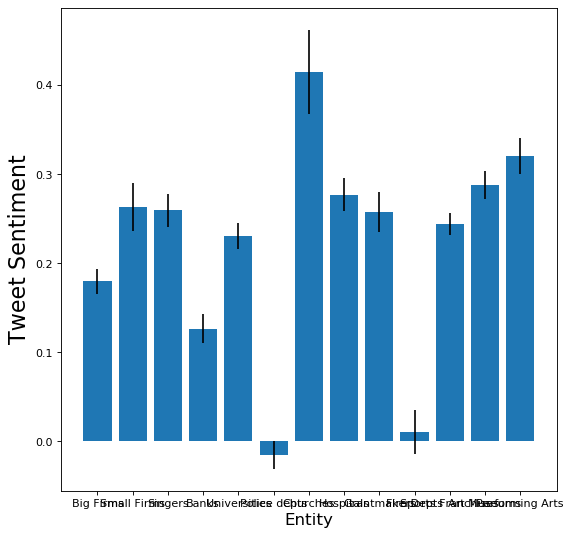

In [221]:
from matplotlib.pyplot import figure

def plot(entity_names, means, sems):
    print('plotting...')
    figure(figsize=(8, 8), dpi=80)
    
    plt.bar(entity_names, means, yerr=sems)
    plt.xlabel("Entity", fontsize=15)
    plt.ylabel("Tweet Sentiment", fontsize=20)
    plt.savefig('new_plot.png')


plot(entities[:-1], means, sems_list)

In [211]:
means

{0: 0.17939374804982602,
 1: 0.2628742280919872,
 2: 0.2595478796173709,
 3: 0.12630449303699676,
 4: 0.2306502400343784,
 5: -0.015228399289919174,
 6: 0.4147159114174225,
 7: 0.2770559253660456,
 8: 0.2569953820596724,
 9: 0.010429645951706111,
 10: 0.24384506714619164,
 11: 0.2880943607947069,
 12: 0.3200697908092839}

In [212]:
sems

{0: 0.014437752835405928,
 1: 0.026905196119823196,
 2: 0.018561094879679822,
 3: 0.016070987745480242,
 4: 0.01425786175151506,
 5: 0.015790975352481626,
 6: 0.04762006731426963,
 7: 0.019009644803665633,
 8: 0.022345084915492204,
 9: 0.02438702304925059,
 10: 0.012167291492097963,
 11: 0.015892293723009602,
 12: 0.02051961088369143}